In [1]:
from skimage import morphology
from scipy import ndimage
from os import listdir
import PIL
import skimage
import PIL.ImageOps

In [2]:
path = 'D:\project_tensorflow_class\Data (1)\original/err/'

In [3]:
matplotlib

Using matplotlib backend: Qt4Agg


In [18]:
##getting files
get_files = listdir(path)
get_files.sort()
get_files

['.picasa.ini',
 'E02 (1).jpg',
 'E02 (10).jpg',
 'E02 (11).jpg',
 'E02 (12).jpg',
 'E02 (13).jpg',
 'E02 (14).jpg',
 'E02 (15).jpg',
 'E02 (16).jpg',
 'E02 (17).jpg',
 'E02 (18).jpg',
 'E02 (19).jpg',
 'E02 (2).jpg',
 'E02 (20).jpg',
 'E02 (21).jpg',
 'E02 (22).jpg',
 'E02 (23).jpg',
 'E02 (24).jpg',
 'E02 (25).jpg',
 'E02 (26).jpg',
 'E02 (27).jpg',
 'E02 (28).jpg',
 'E02 (29).jpg',
 'E02 (3).jpg',
 'E02 (30).jpg',
 'E02 (31).jpg',
 'E02 (32).jpg',
 'E02 (33).jpg',
 'E02 (34).jpg',
 'E02 (35).jpg',
 'E02 (36).jpg',
 'E02 (37).jpg',
 'E02 (38).jpg',
 'E02 (39).jpg',
 'E02 (4).jpg',
 'E02 (40).jpg',
 'E02 (41).jpg',
 'E02 (42).jpg',
 'E02 (5).jpg',
 'E02 (6).jpg',
 'E02 (7).jpg',
 'E02 (8).jpg',
 'E02 (9).jpg',
 'test']

In [19]:
for i,file in enumerate(get_files):
    print(i,file)

0 .picasa.ini
1 E02 (1).jpg
2 E02 (10).jpg
3 E02 (11).jpg
4 E02 (12).jpg
5 E02 (13).jpg
6 E02 (14).jpg
7 E02 (15).jpg
8 E02 (16).jpg
9 E02 (17).jpg
10 E02 (18).jpg
11 E02 (19).jpg
12 E02 (2).jpg
13 E02 (20).jpg
14 E02 (21).jpg
15 E02 (22).jpg
16 E02 (23).jpg
17 E02 (24).jpg
18 E02 (25).jpg
19 E02 (26).jpg
20 E02 (27).jpg
21 E02 (28).jpg
22 E02 (29).jpg
23 E02 (3).jpg
24 E02 (30).jpg
25 E02 (31).jpg
26 E02 (32).jpg
27 E02 (33).jpg
28 E02 (34).jpg
29 E02 (35).jpg
30 E02 (36).jpg
31 E02 (37).jpg
32 E02 (38).jpg
33 E02 (39).jpg
34 E02 (4).jpg
35 E02 (40).jpg
36 E02 (41).jpg
37 E02 (42).jpg
38 E02 (5).jpg
39 E02 (6).jpg
40 E02 (7).jpg
41 E02 (8).jpg
42 E02 (9).jpg
43 test


In [20]:
j = 0
for i,file in enumerate(get_files):
    if file.find('.jpg') == -1:
        print(i,get_files.pop(i-j))
#         j+=1
get_files

0 .picasa.ini
42 test


['E02 (1).jpg',
 'E02 (10).jpg',
 'E02 (11).jpg',
 'E02 (12).jpg',
 'E02 (13).jpg',
 'E02 (14).jpg',
 'E02 (15).jpg',
 'E02 (16).jpg',
 'E02 (17).jpg',
 'E02 (18).jpg',
 'E02 (19).jpg',
 'E02 (2).jpg',
 'E02 (20).jpg',
 'E02 (21).jpg',
 'E02 (22).jpg',
 'E02 (23).jpg',
 'E02 (24).jpg',
 'E02 (25).jpg',
 'E02 (26).jpg',
 'E02 (27).jpg',
 'E02 (28).jpg',
 'E02 (29).jpg',
 'E02 (3).jpg',
 'E02 (30).jpg',
 'E02 (31).jpg',
 'E02 (32).jpg',
 'E02 (33).jpg',
 'E02 (34).jpg',
 'E02 (35).jpg',
 'E02 (36).jpg',
 'E02 (37).jpg',
 'E02 (38).jpg',
 'E02 (39).jpg',
 'E02 (4).jpg',
 'E02 (40).jpg',
 'E02 (41).jpg',
 'E02 (42).jpg',
 'E02 (5).jpg',
 'E02 (6).jpg',
 'E02 (7).jpg',
 'E02 (8).jpg',
 'E02 (9).jpg']

In [75]:
## PILImage 개체를 바이너라이즈(이진화 시킴)
def make_bw (x):
    img_ret= x.point(lambda c : 255 if c >127 else 0)
    return img_ret

In [21]:
img = path + get_files[15]

In [22]:
Pa = PIL.Image.open(img)
a = np.array(Pa)

## Denoising

### Gamma control - grid search

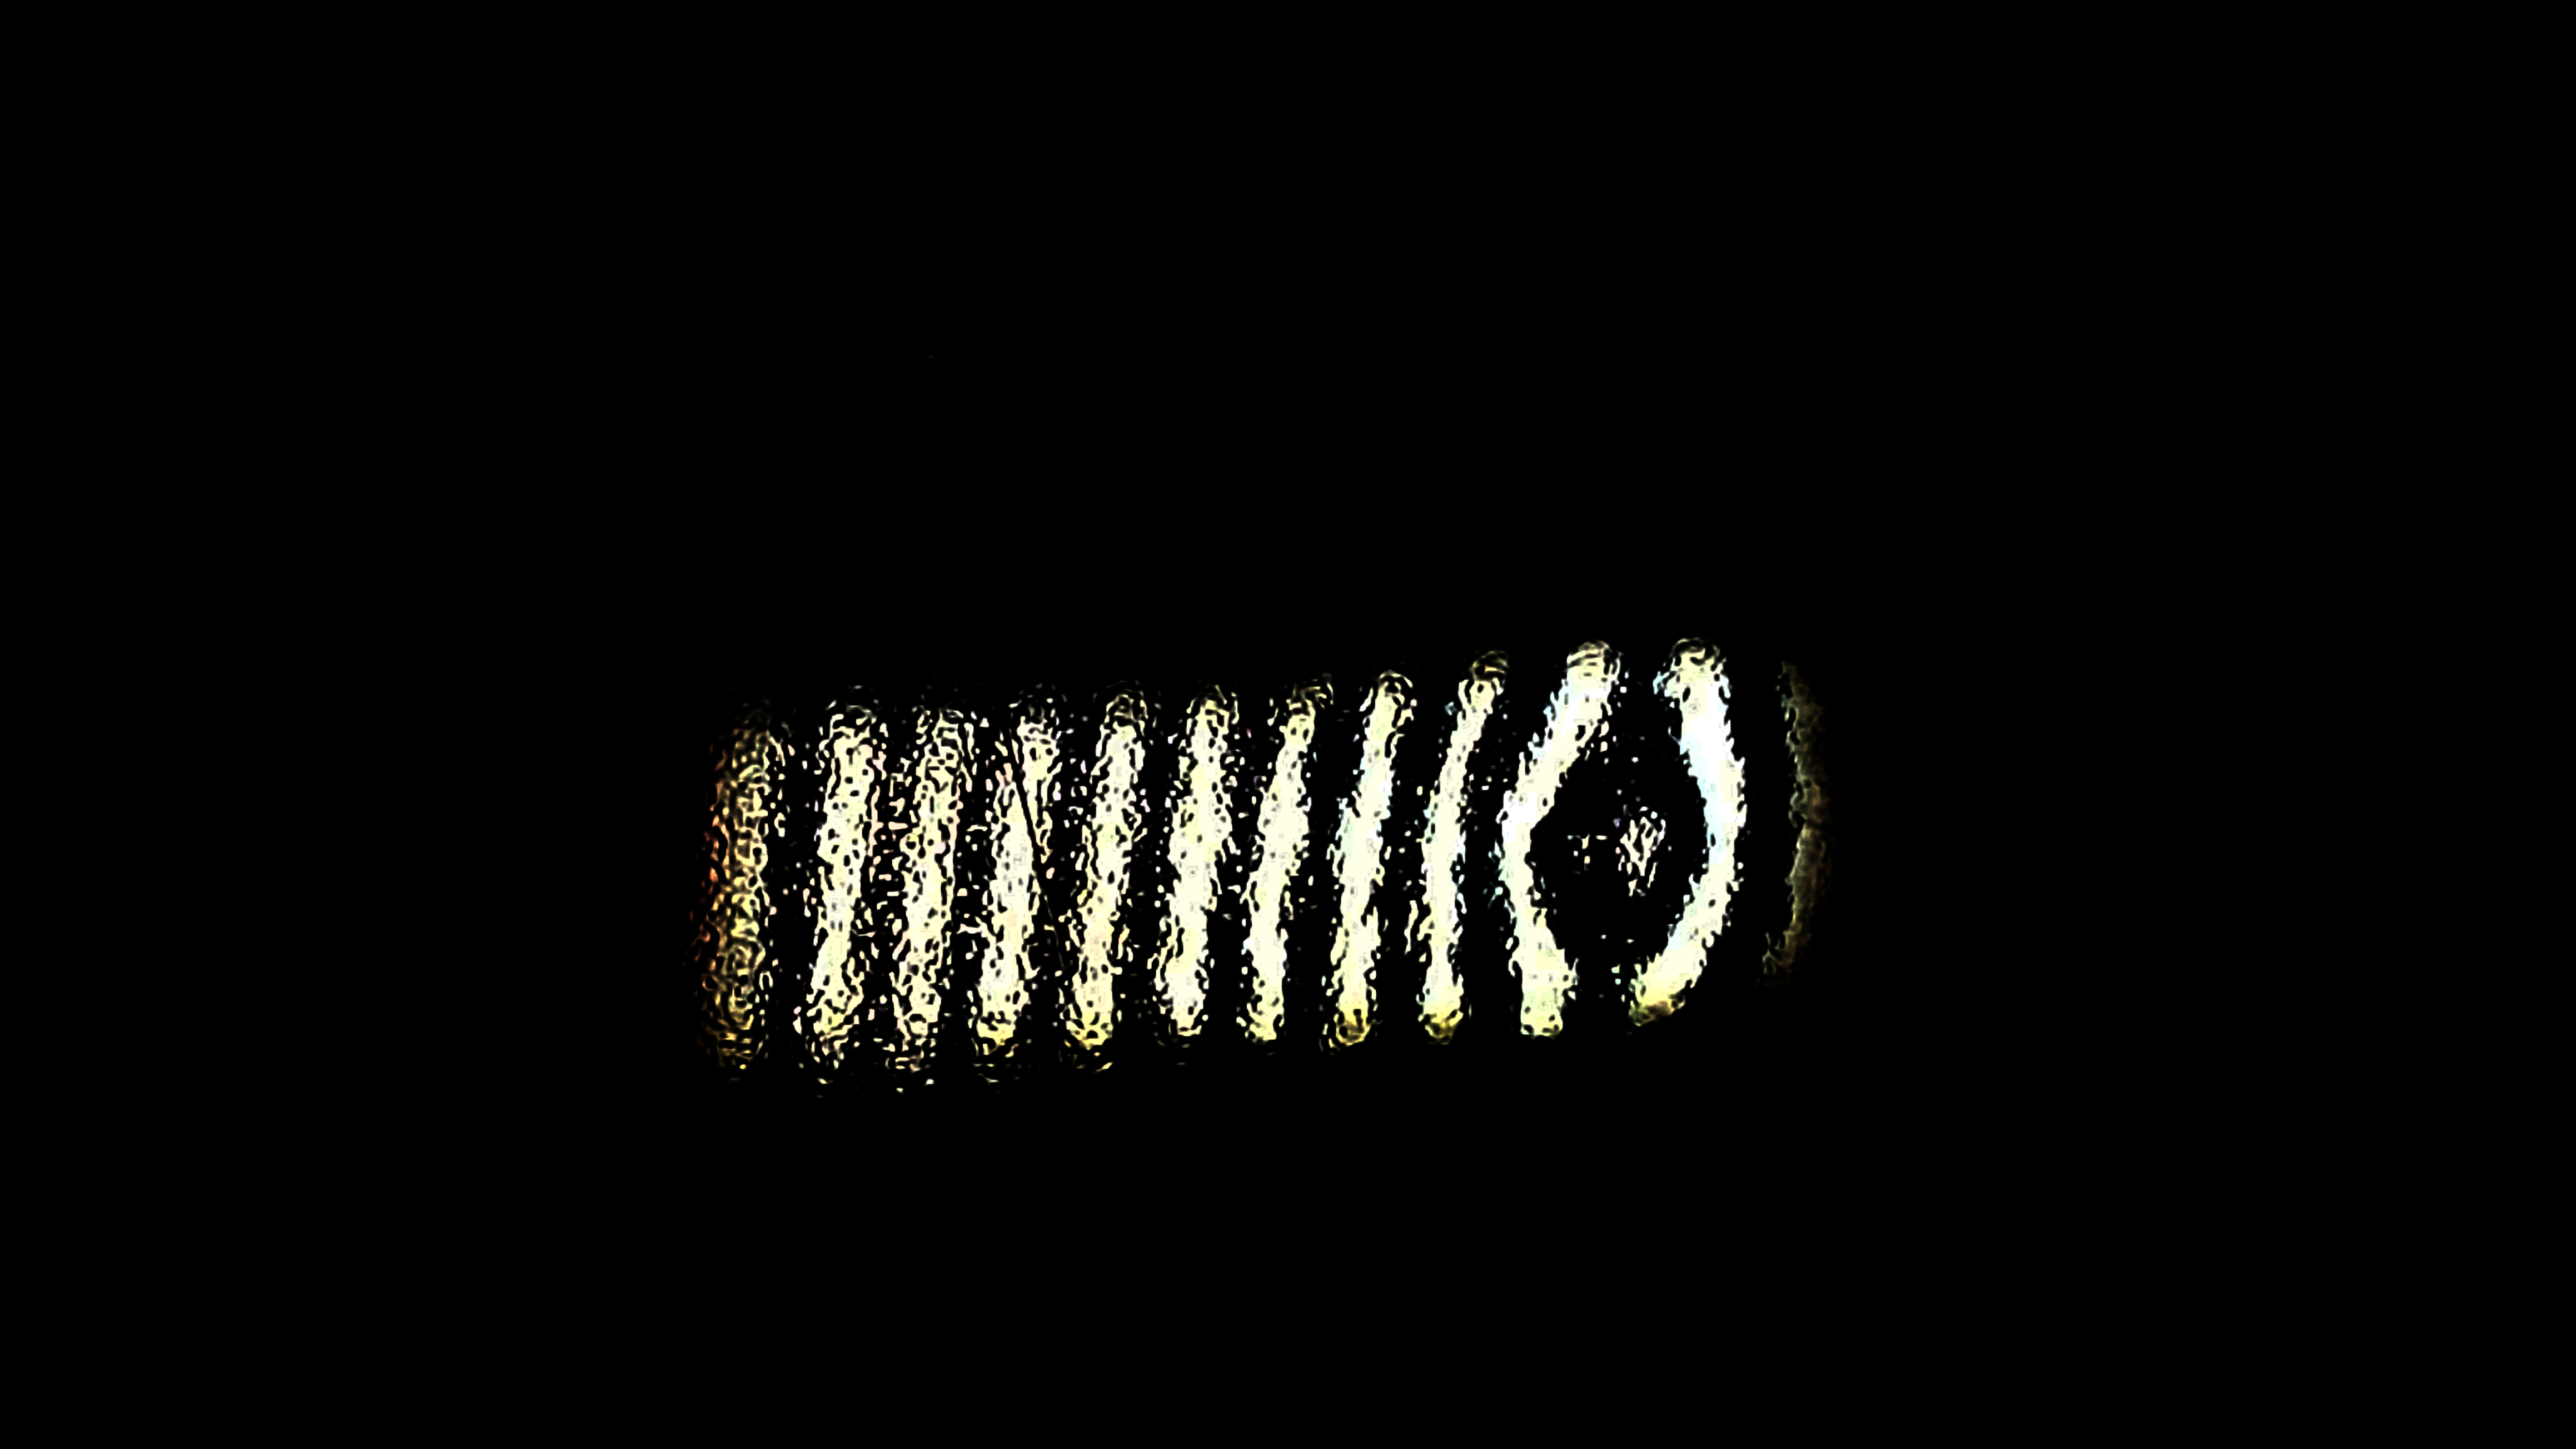

In [23]:
qwer = Pa.point(lambda x : (255*(x/255)**(13)))
qwer


In [24]:
fig,axes = plt.subplots(2,2)
((ax1, ax2), (ax3, ax4)) = axes

fig.add_subplot(221,label = 'a')
plt.imshow(a)
ax1.set_title('a')
plt.axis('off')
plt.axis('tight')


fig.add_subplot(222,label = 'gamma = 3')
plt.imshow((a/255)**3)
ax2.set_title('gamma = 3')
plt.axis('off')
plt.axis('tight')


fig.add_subplot(223,label = 'gamma = 6')
plt.imshow((a/255)**6)
ax3.set_title( 'gamma = 6')
plt.axis('off')
plt.axis('tight')

fig.add_subplot(224,label ='gamma 13')
plt.imshow((a/255)**13)
ax4.set_title('gamma 13')
plt.axis('off')
plt.axis('tight')

fig.subplots_adjust(left=0.01,top=0.95,bottom = 0,right=1)

### gray scaled

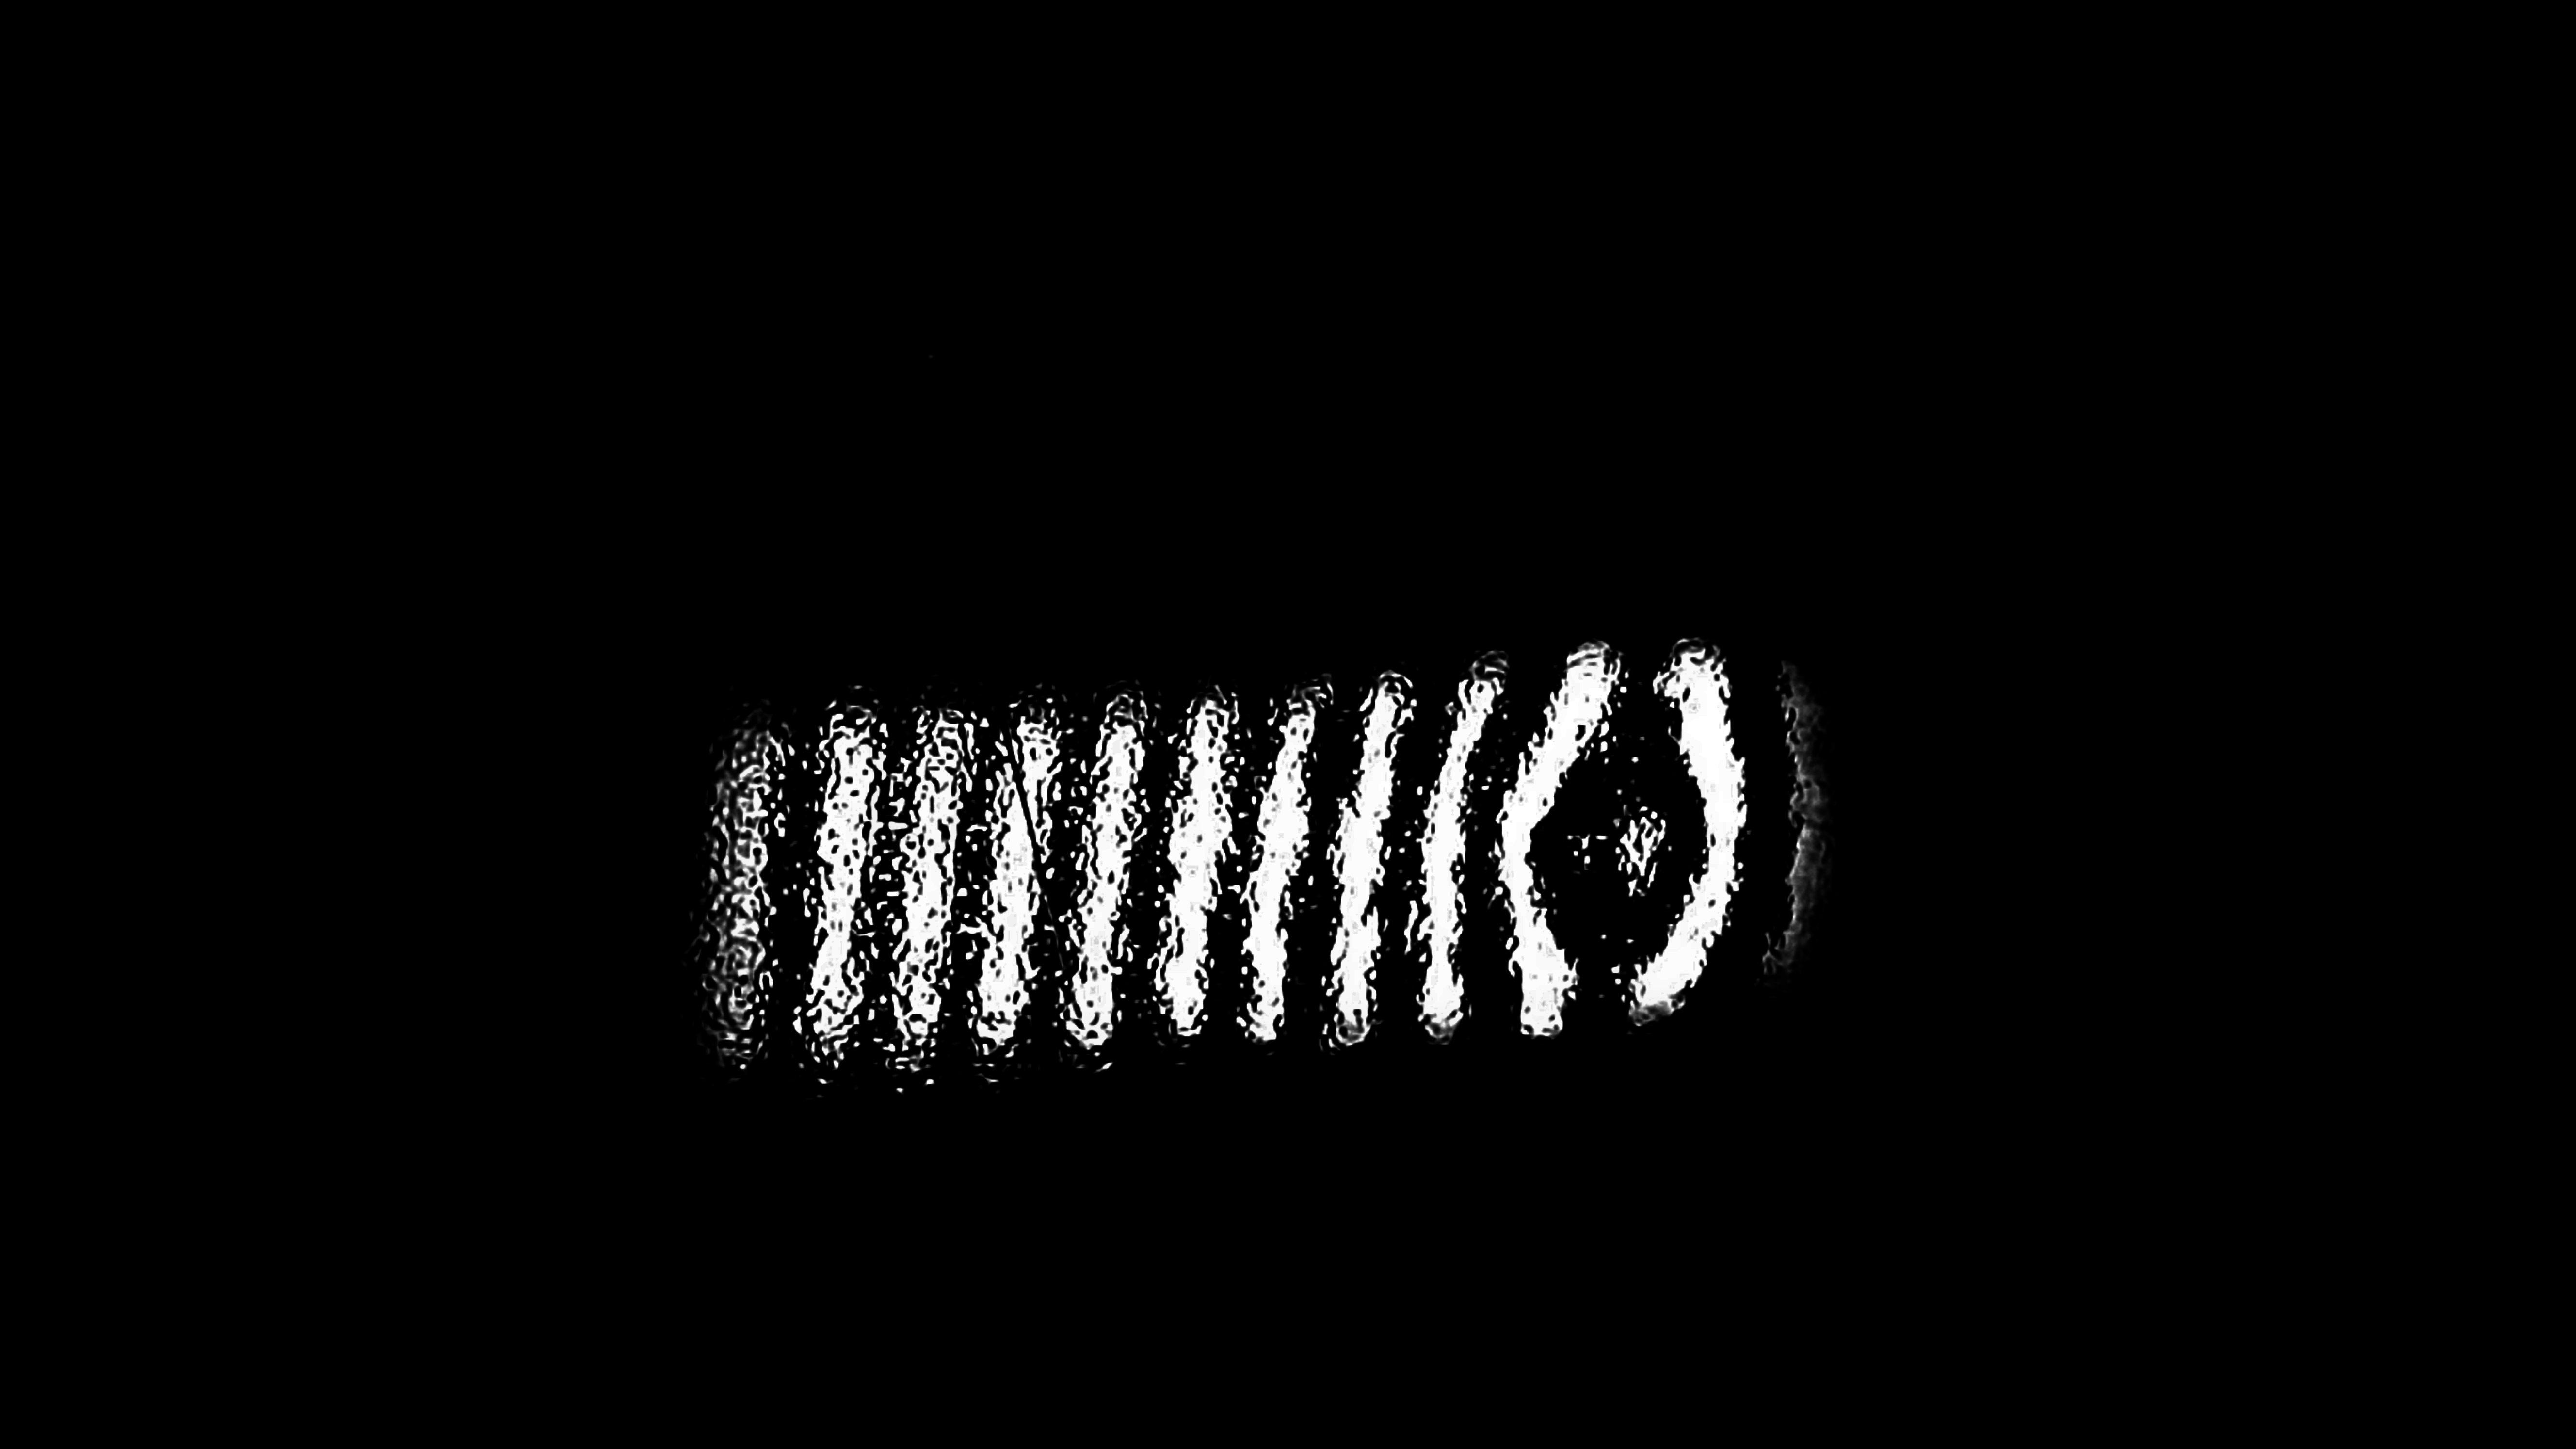

In [25]:
ps_new = Pa.copy()
Pa.point(lambda s :255*(s/255)**13).convert('L')

In [26]:
ps_new = ps_new.convert('L')

In [27]:
ps_new2 = ps_new.point(lambda s :255*(s/255)**13)

In [28]:
ps_new_inv = PIL.ImageOps.invert(ps_new2)

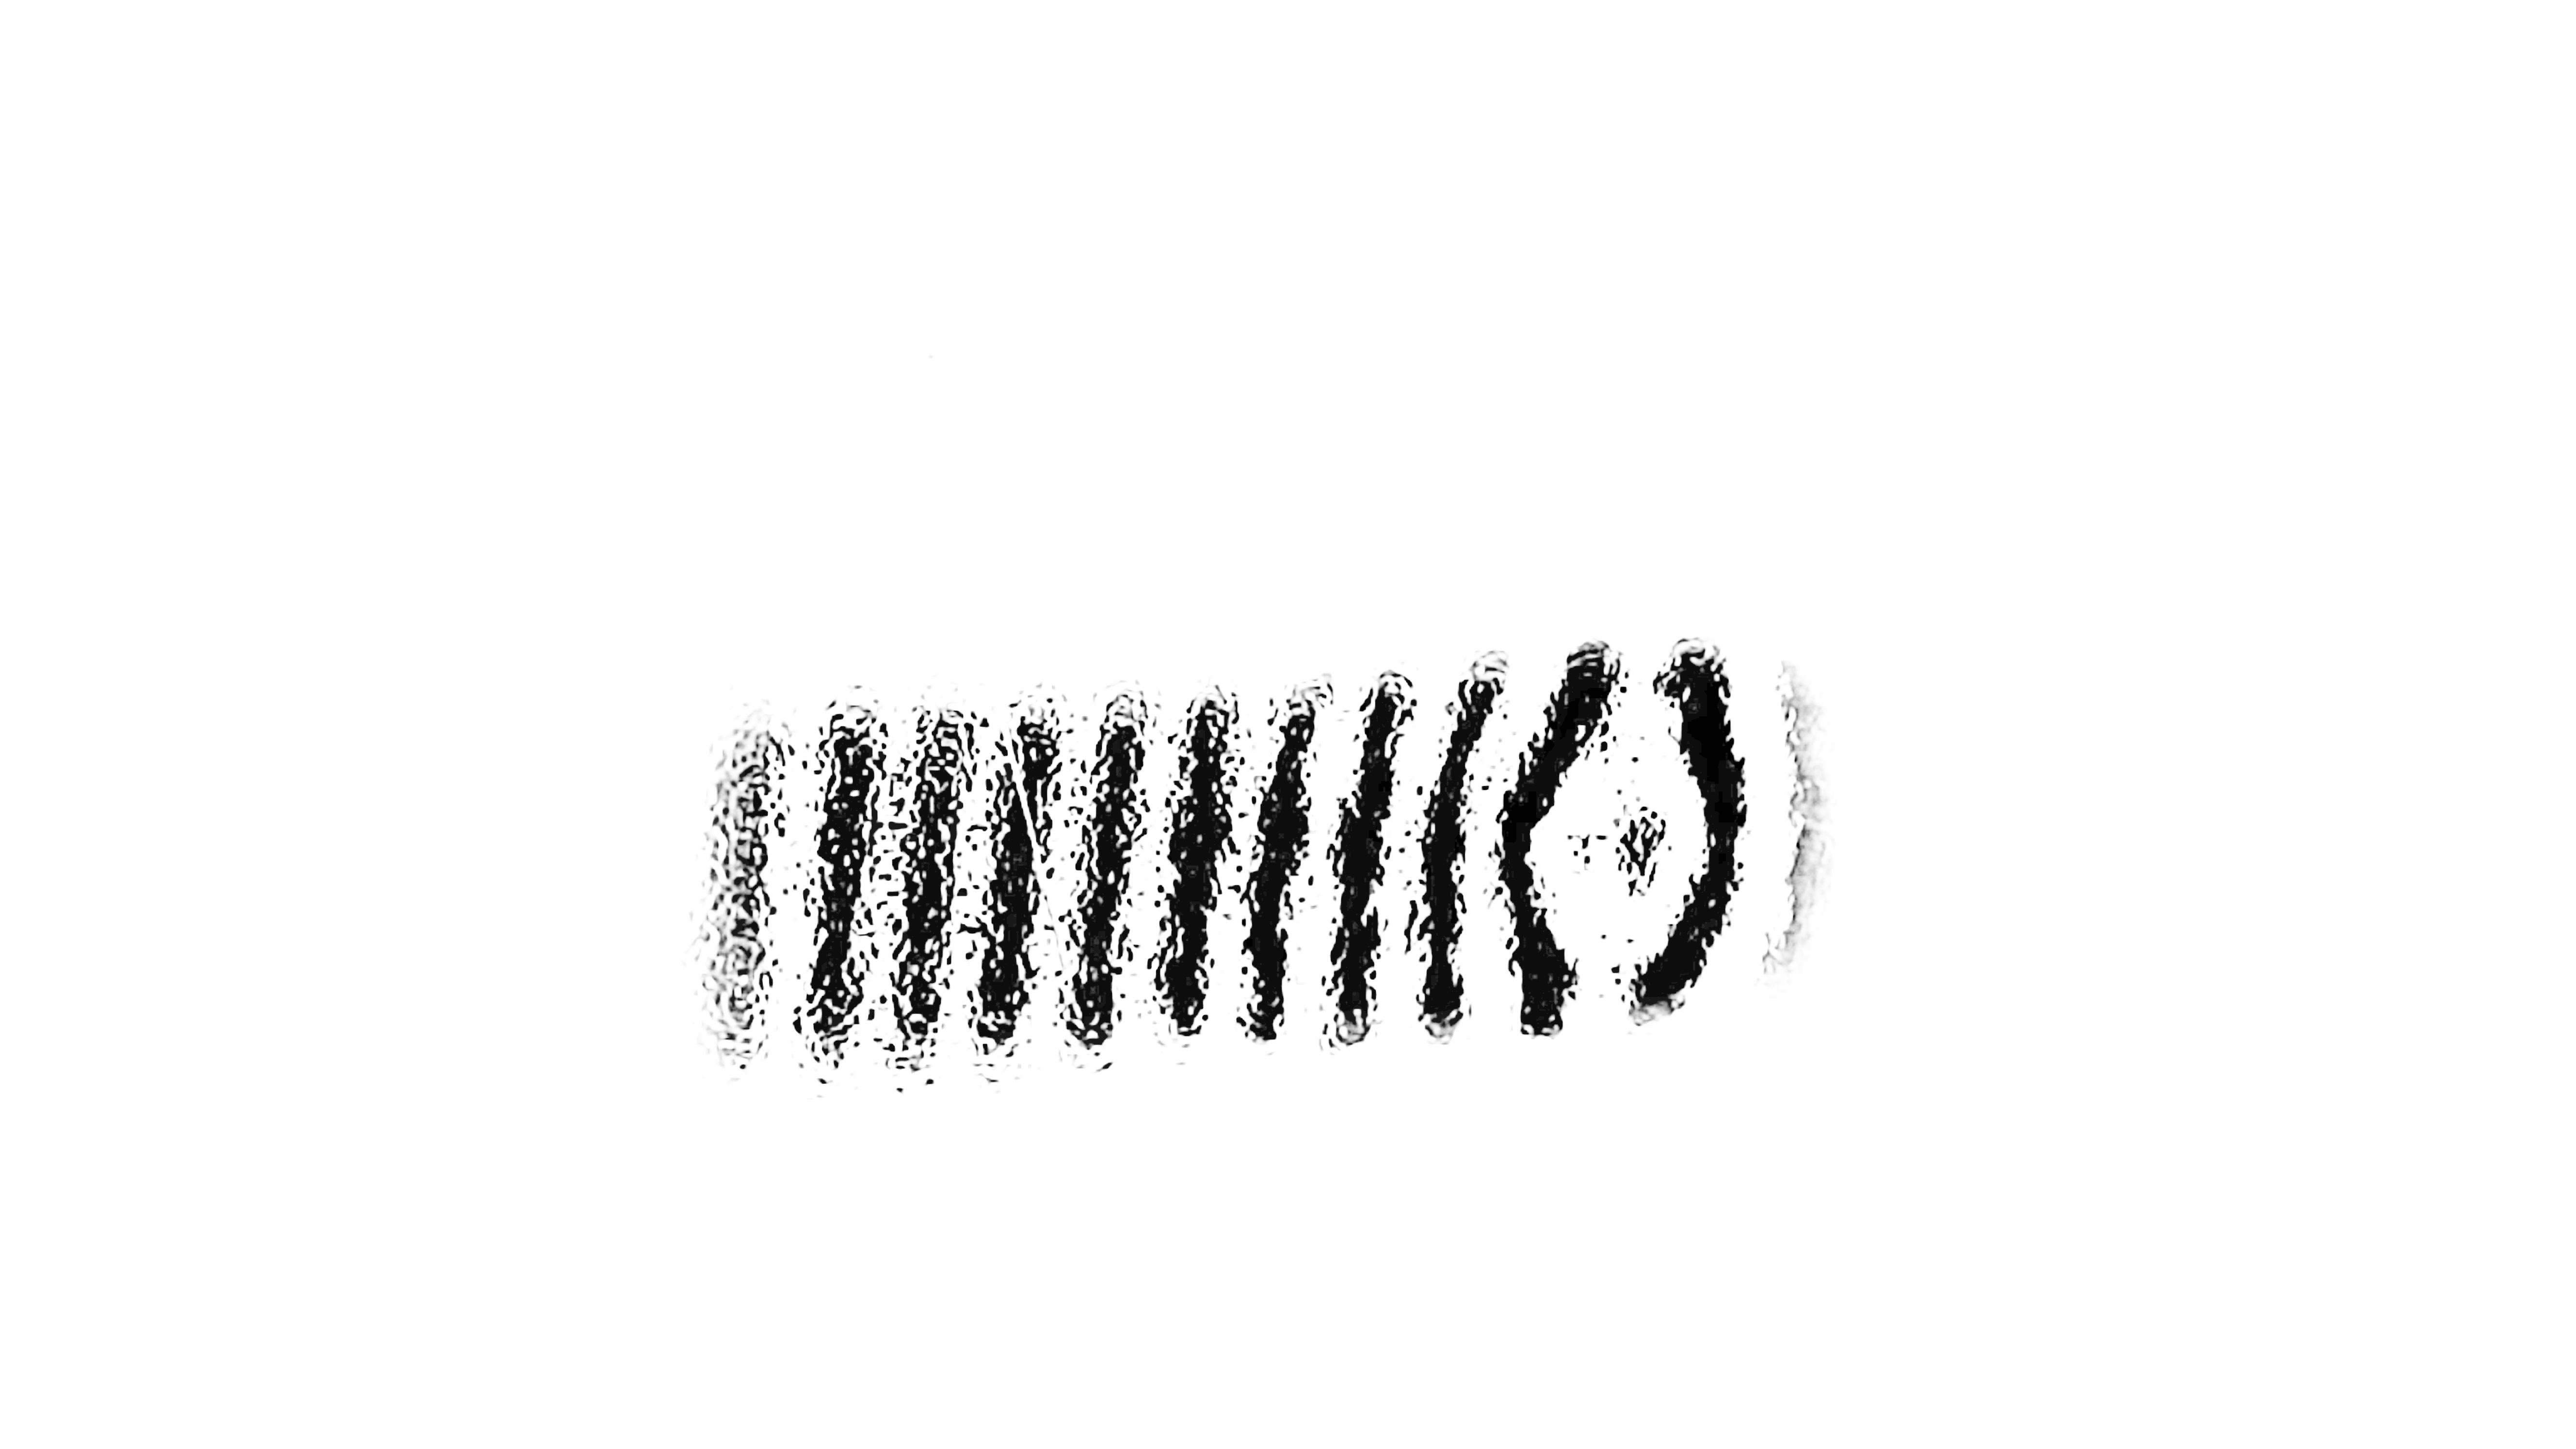

In [29]:
ps_new_inv

### Dilation and erosion -grid search / openning is need between them

In [30]:
# erosion and dilation
def grey_ero_dil (x,iterat = 3, n_ero = 30, n_dil=20):
    for i in range(iterat):
        
        e = ndimage.grey_erosion(x, n_ero)
        #,structure=[[0,1,2],[0,2,0],[1,2,0]]

        r= ndimage.grey_dilation(e, n_dil)

    return r

In [31]:
gogo = grey_ero_dil(ps_new2,iterat=5,n_ero=13, n_dil=60)

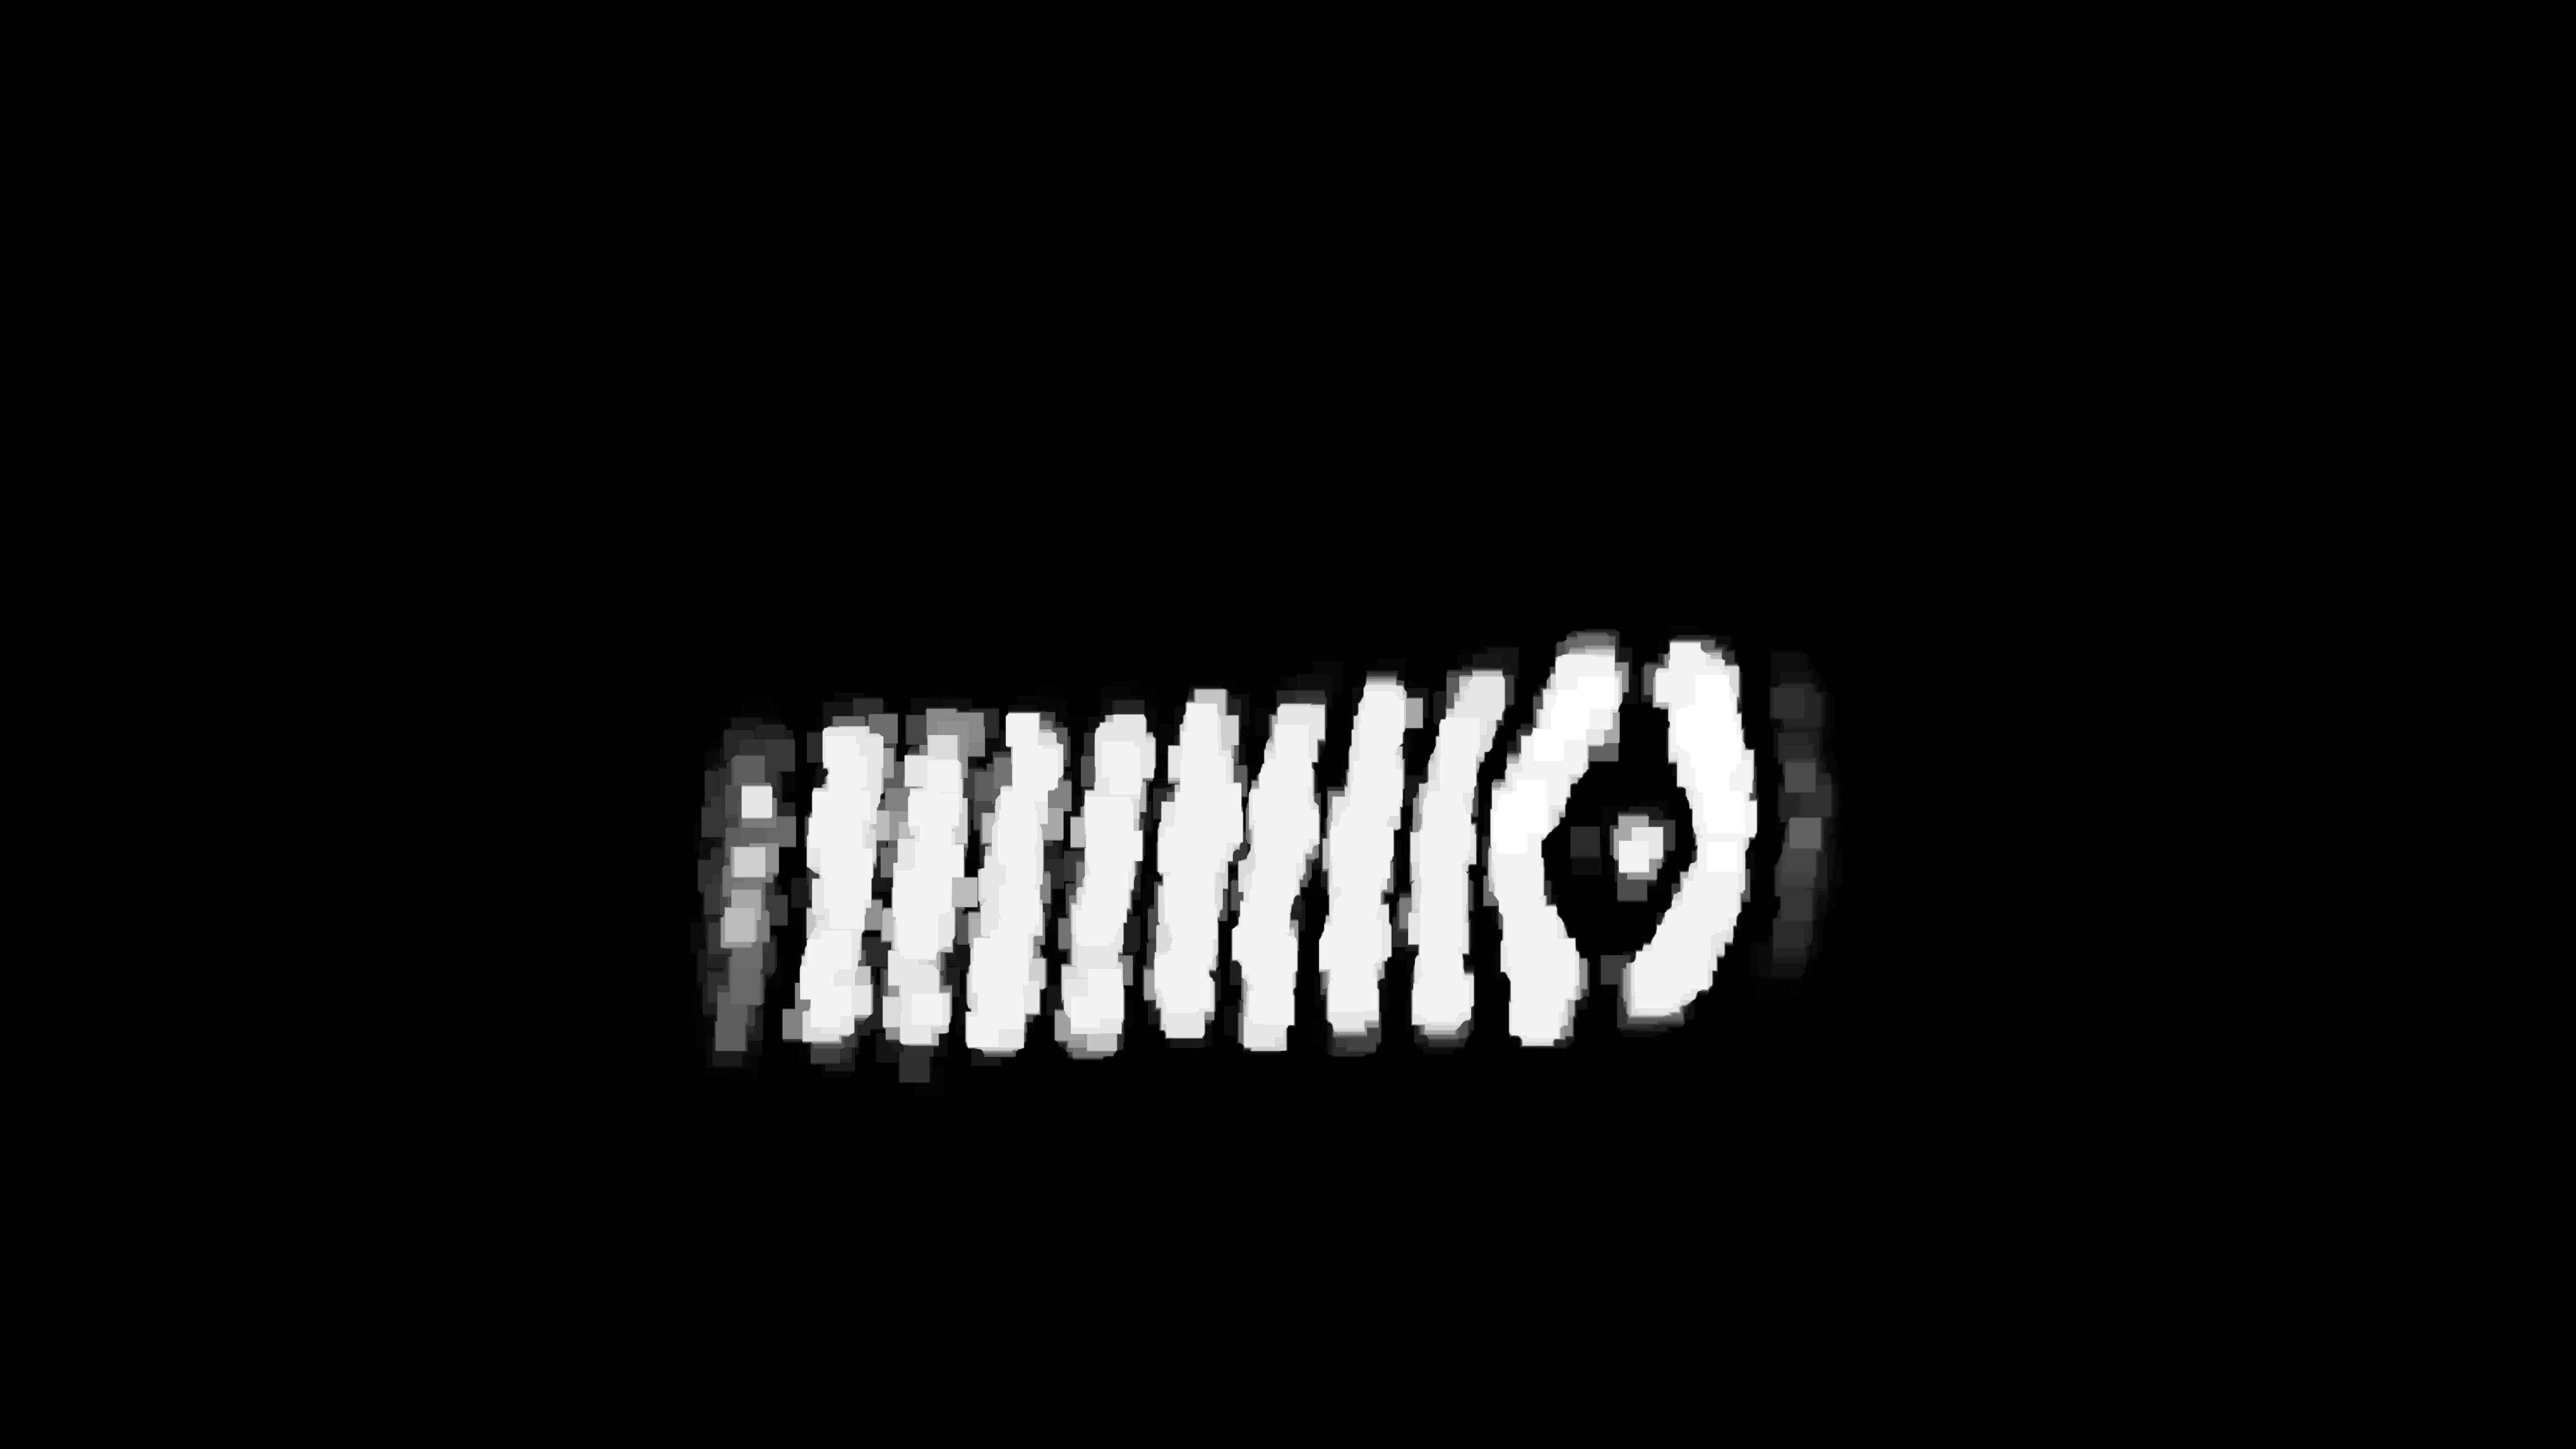

In [32]:
ssss = PIL.Image.fromarray(gogo)
ssss

In [33]:
plt.imshow(ndimage.grey_dilation(gogo, 60)
)


## Labeling for getting $n$ object

### Edge and contour

In [34]:
dddd= ssss.filter(PIL.ImageFilter.FIND_EDGES())

In [35]:
ss2 = PIL.ImageOps.invert(ssss)

### Binaraize

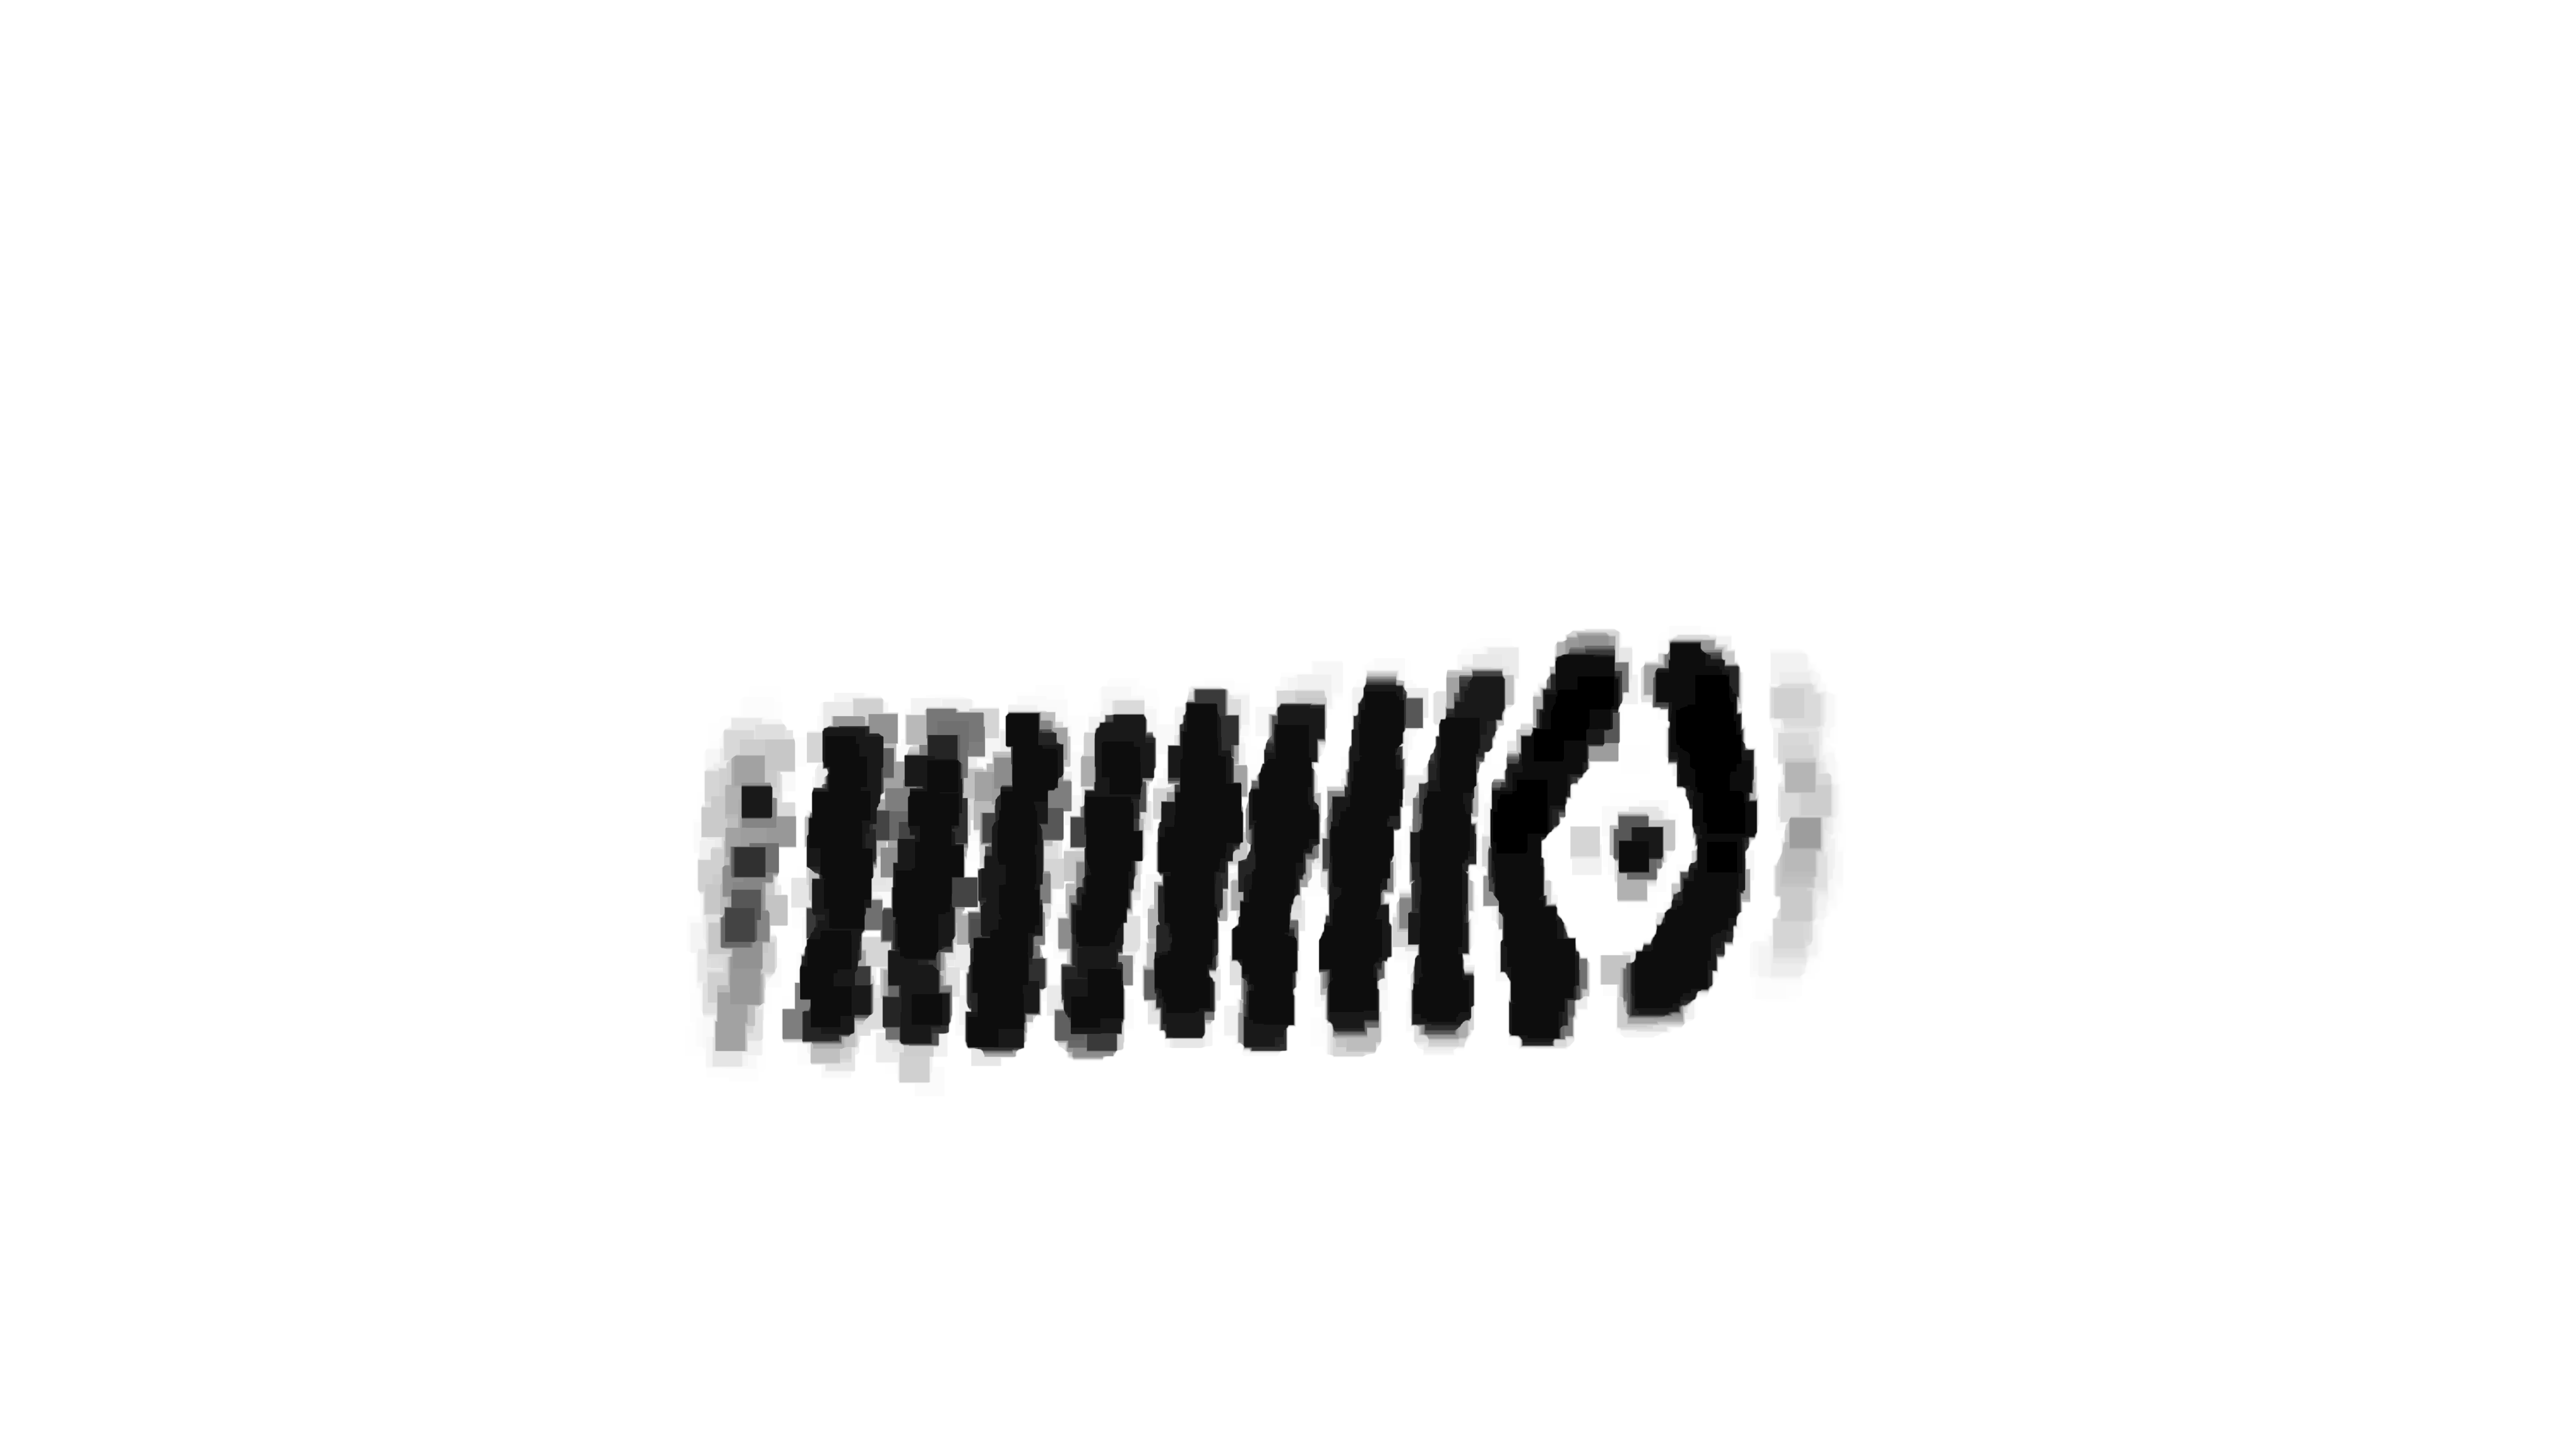

In [36]:
ss2

In [42]:
ffff= ss2.point(lambda c : 255 if c >127 else 0)


### Objectize by finding edges

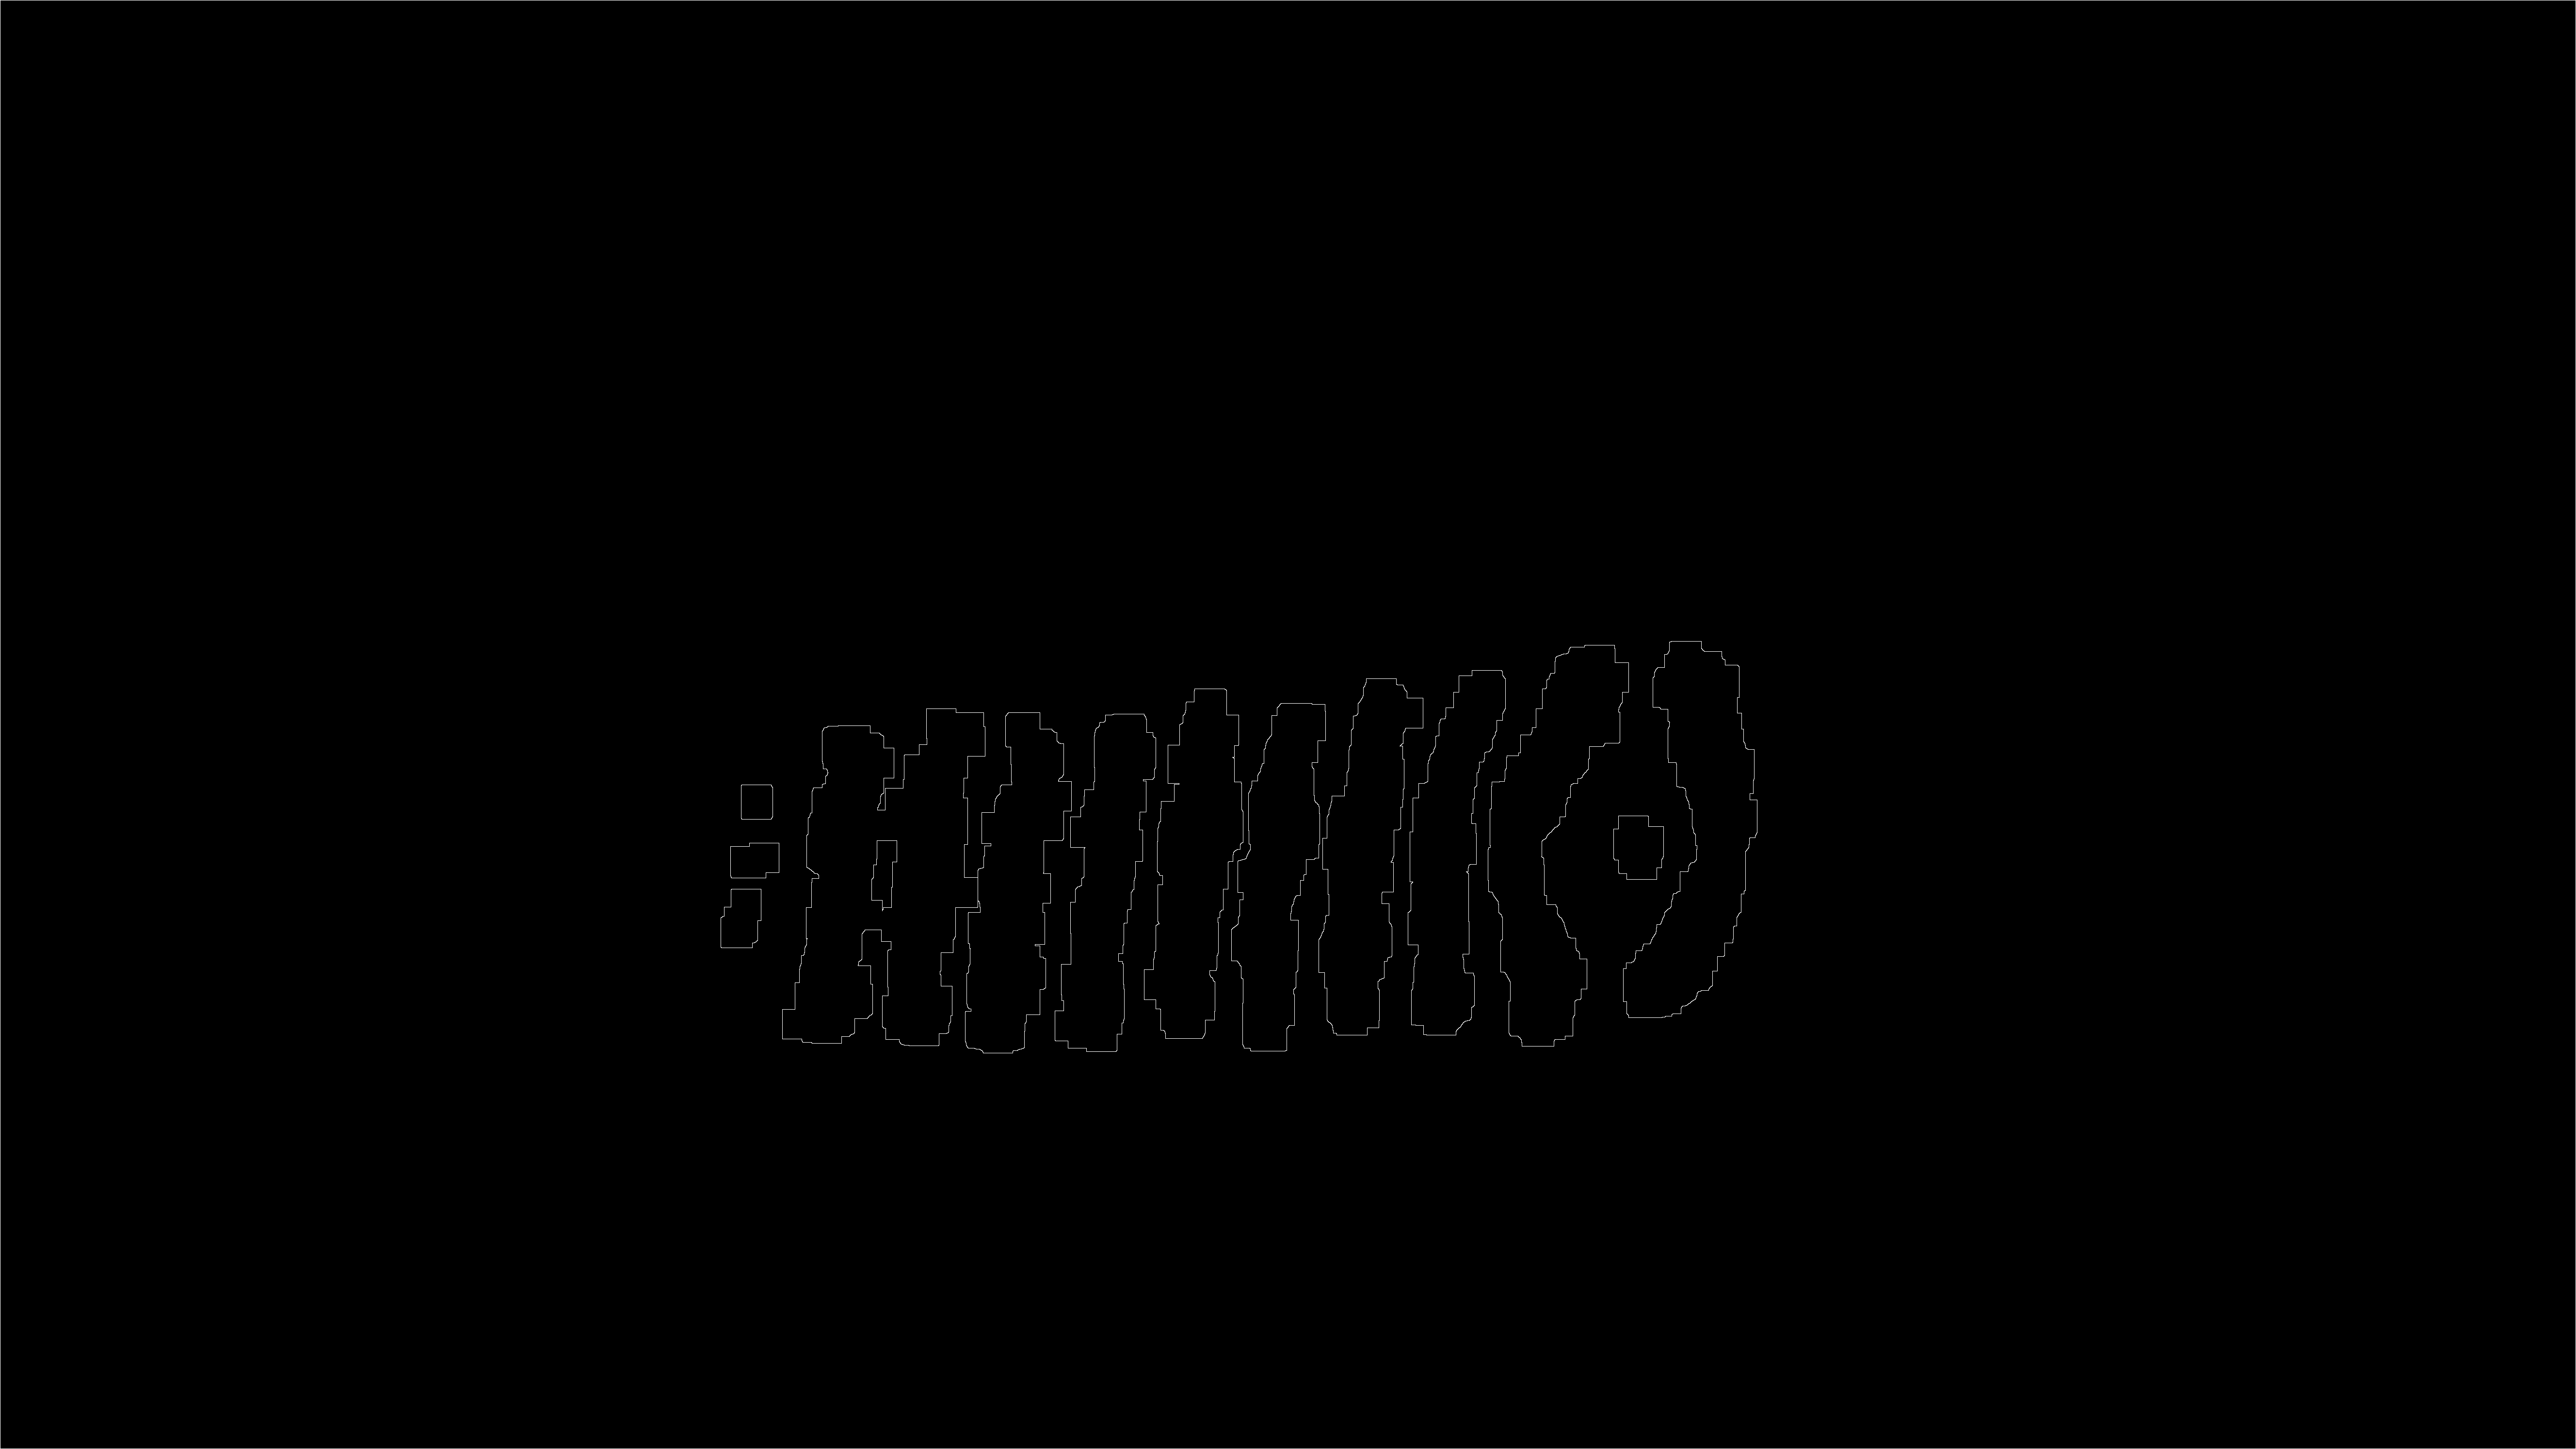

In [43]:
ff2= ffff.filter(PIL.ImageFilter.FIND_EDGES)
ff2=ff2.filter(PIL.ImageFilter.EDGE_ENHANCE_MORE)
ff2

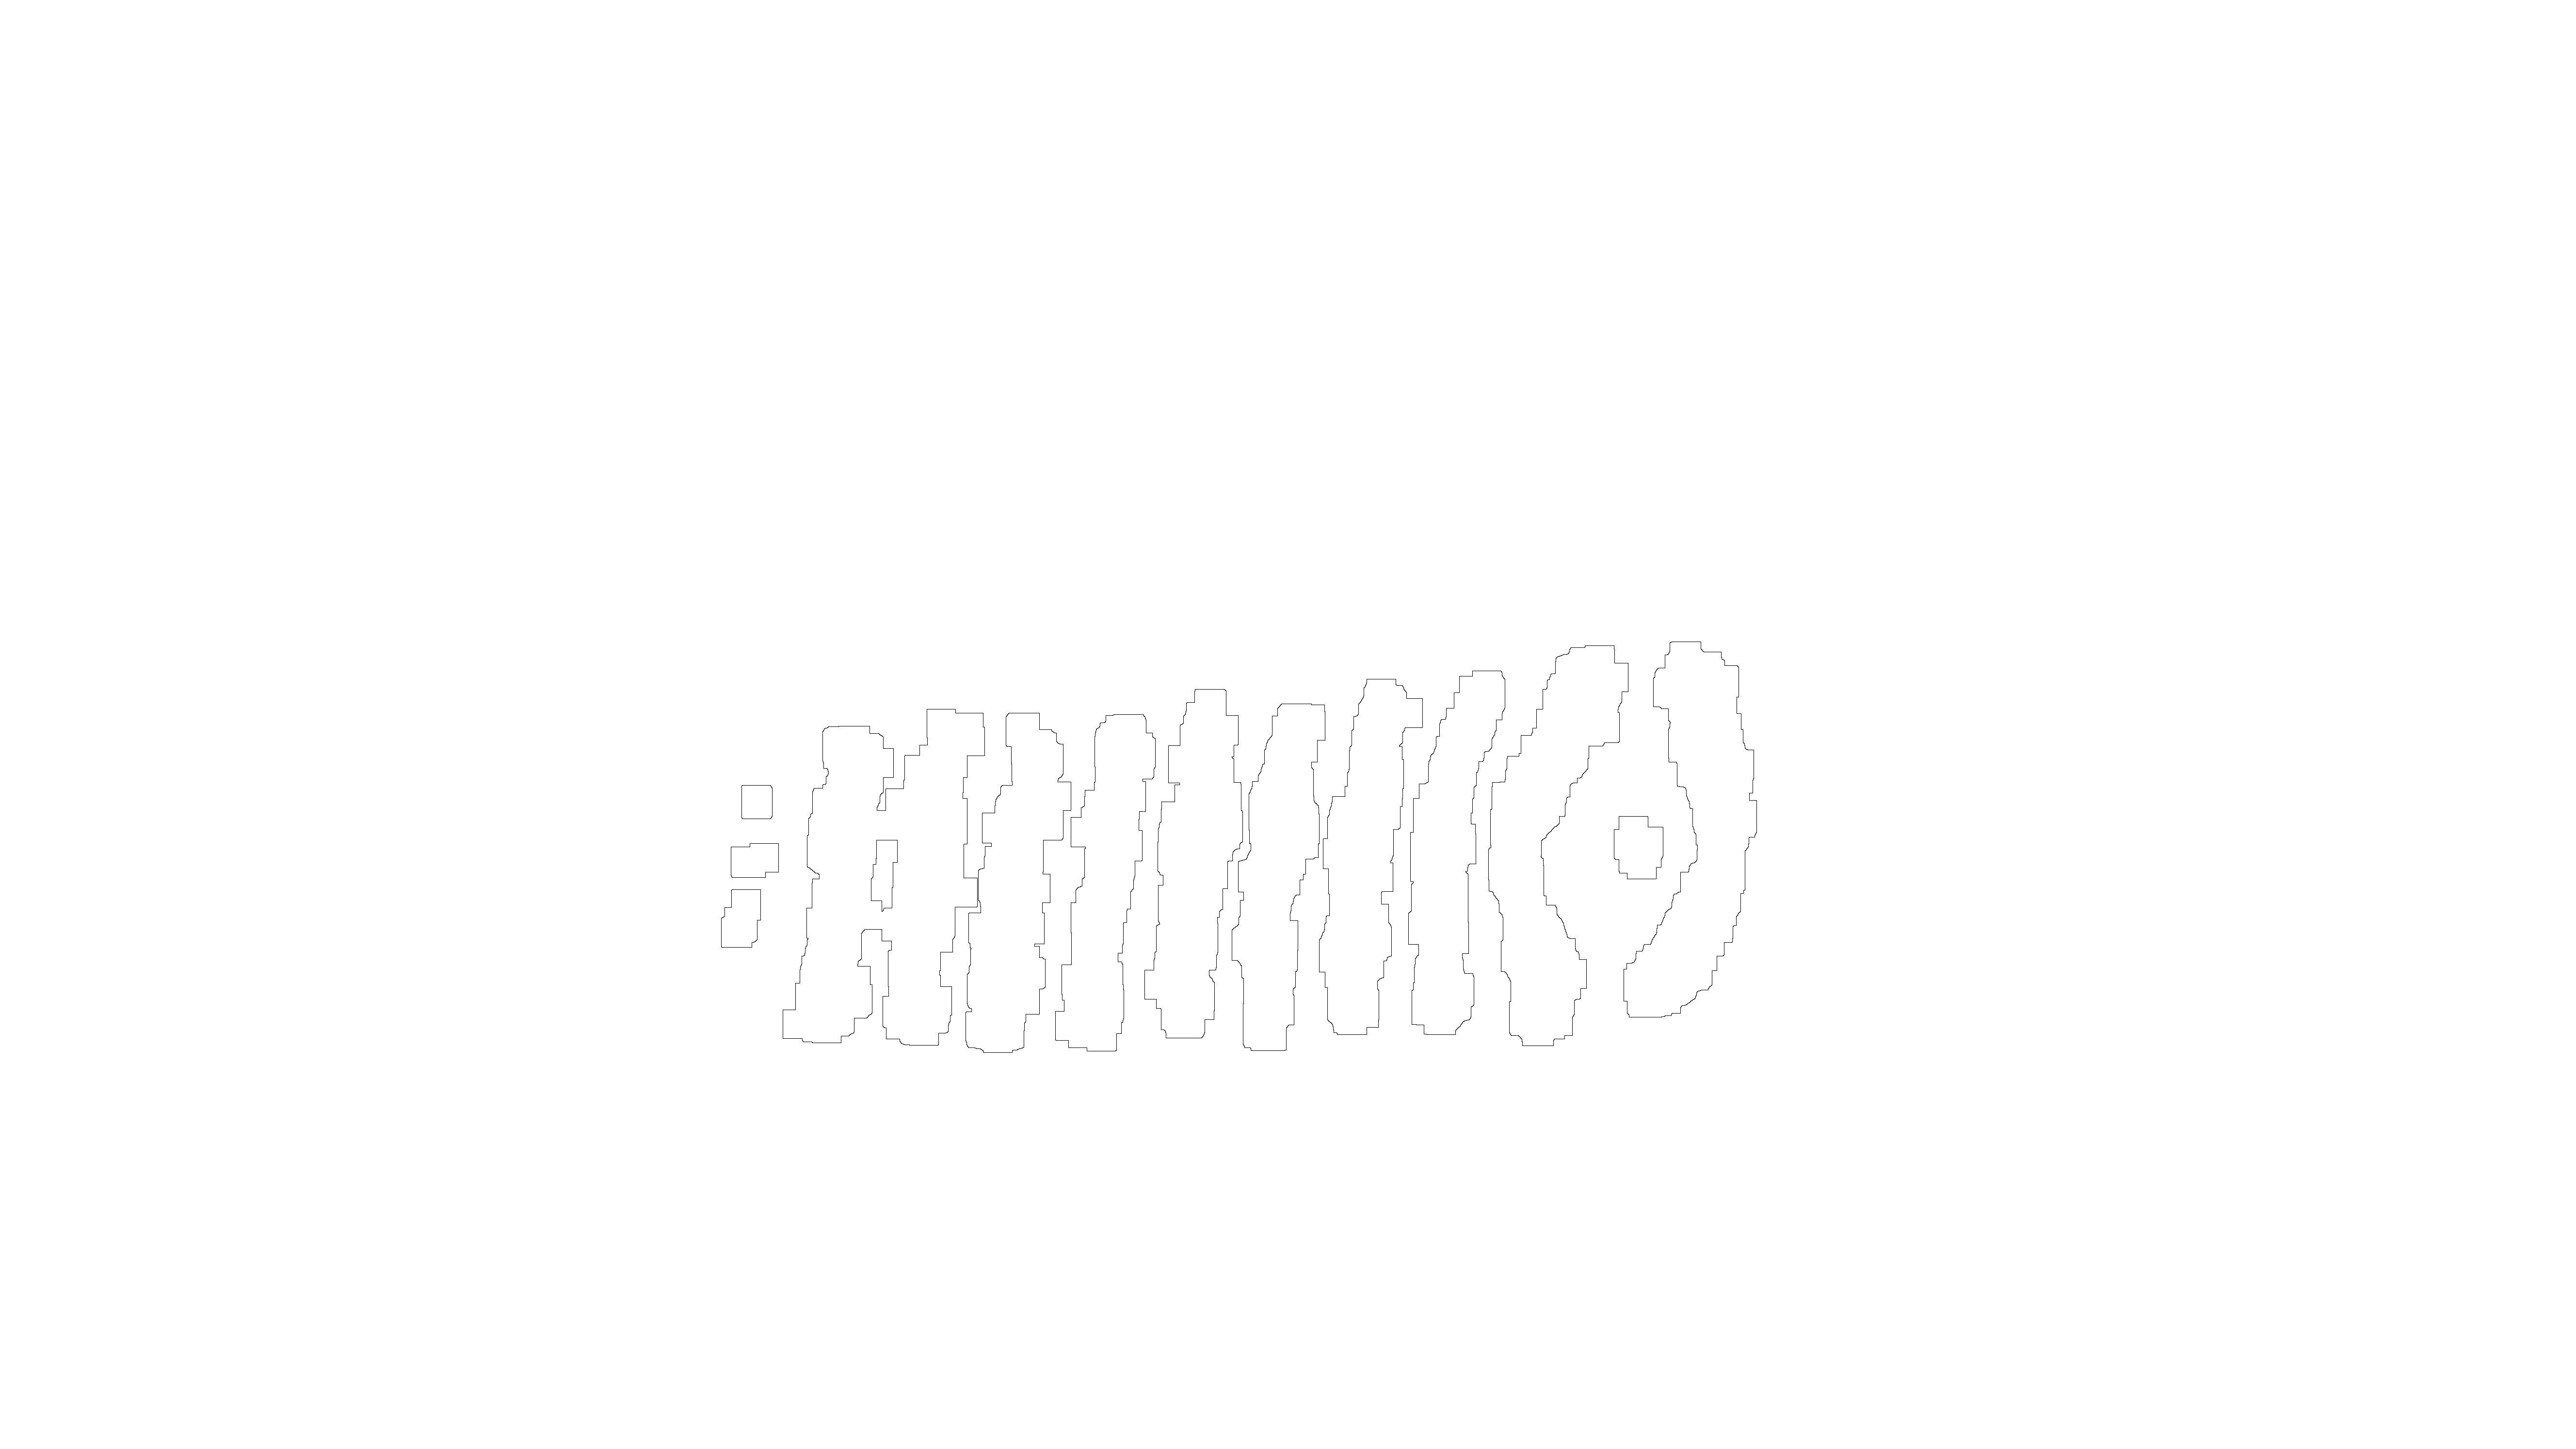

In [44]:
ff3= ffff.filter(PIL.ImageFilter.CONTOUR)
ff3

In [45]:
ffffr = PIL.ImageOps.invert(ffff)

In [46]:
ff2r = PIL.ImageOps.invert(ff2)

In [47]:
ff3r = PIL.ImageOps.invert(ff3)

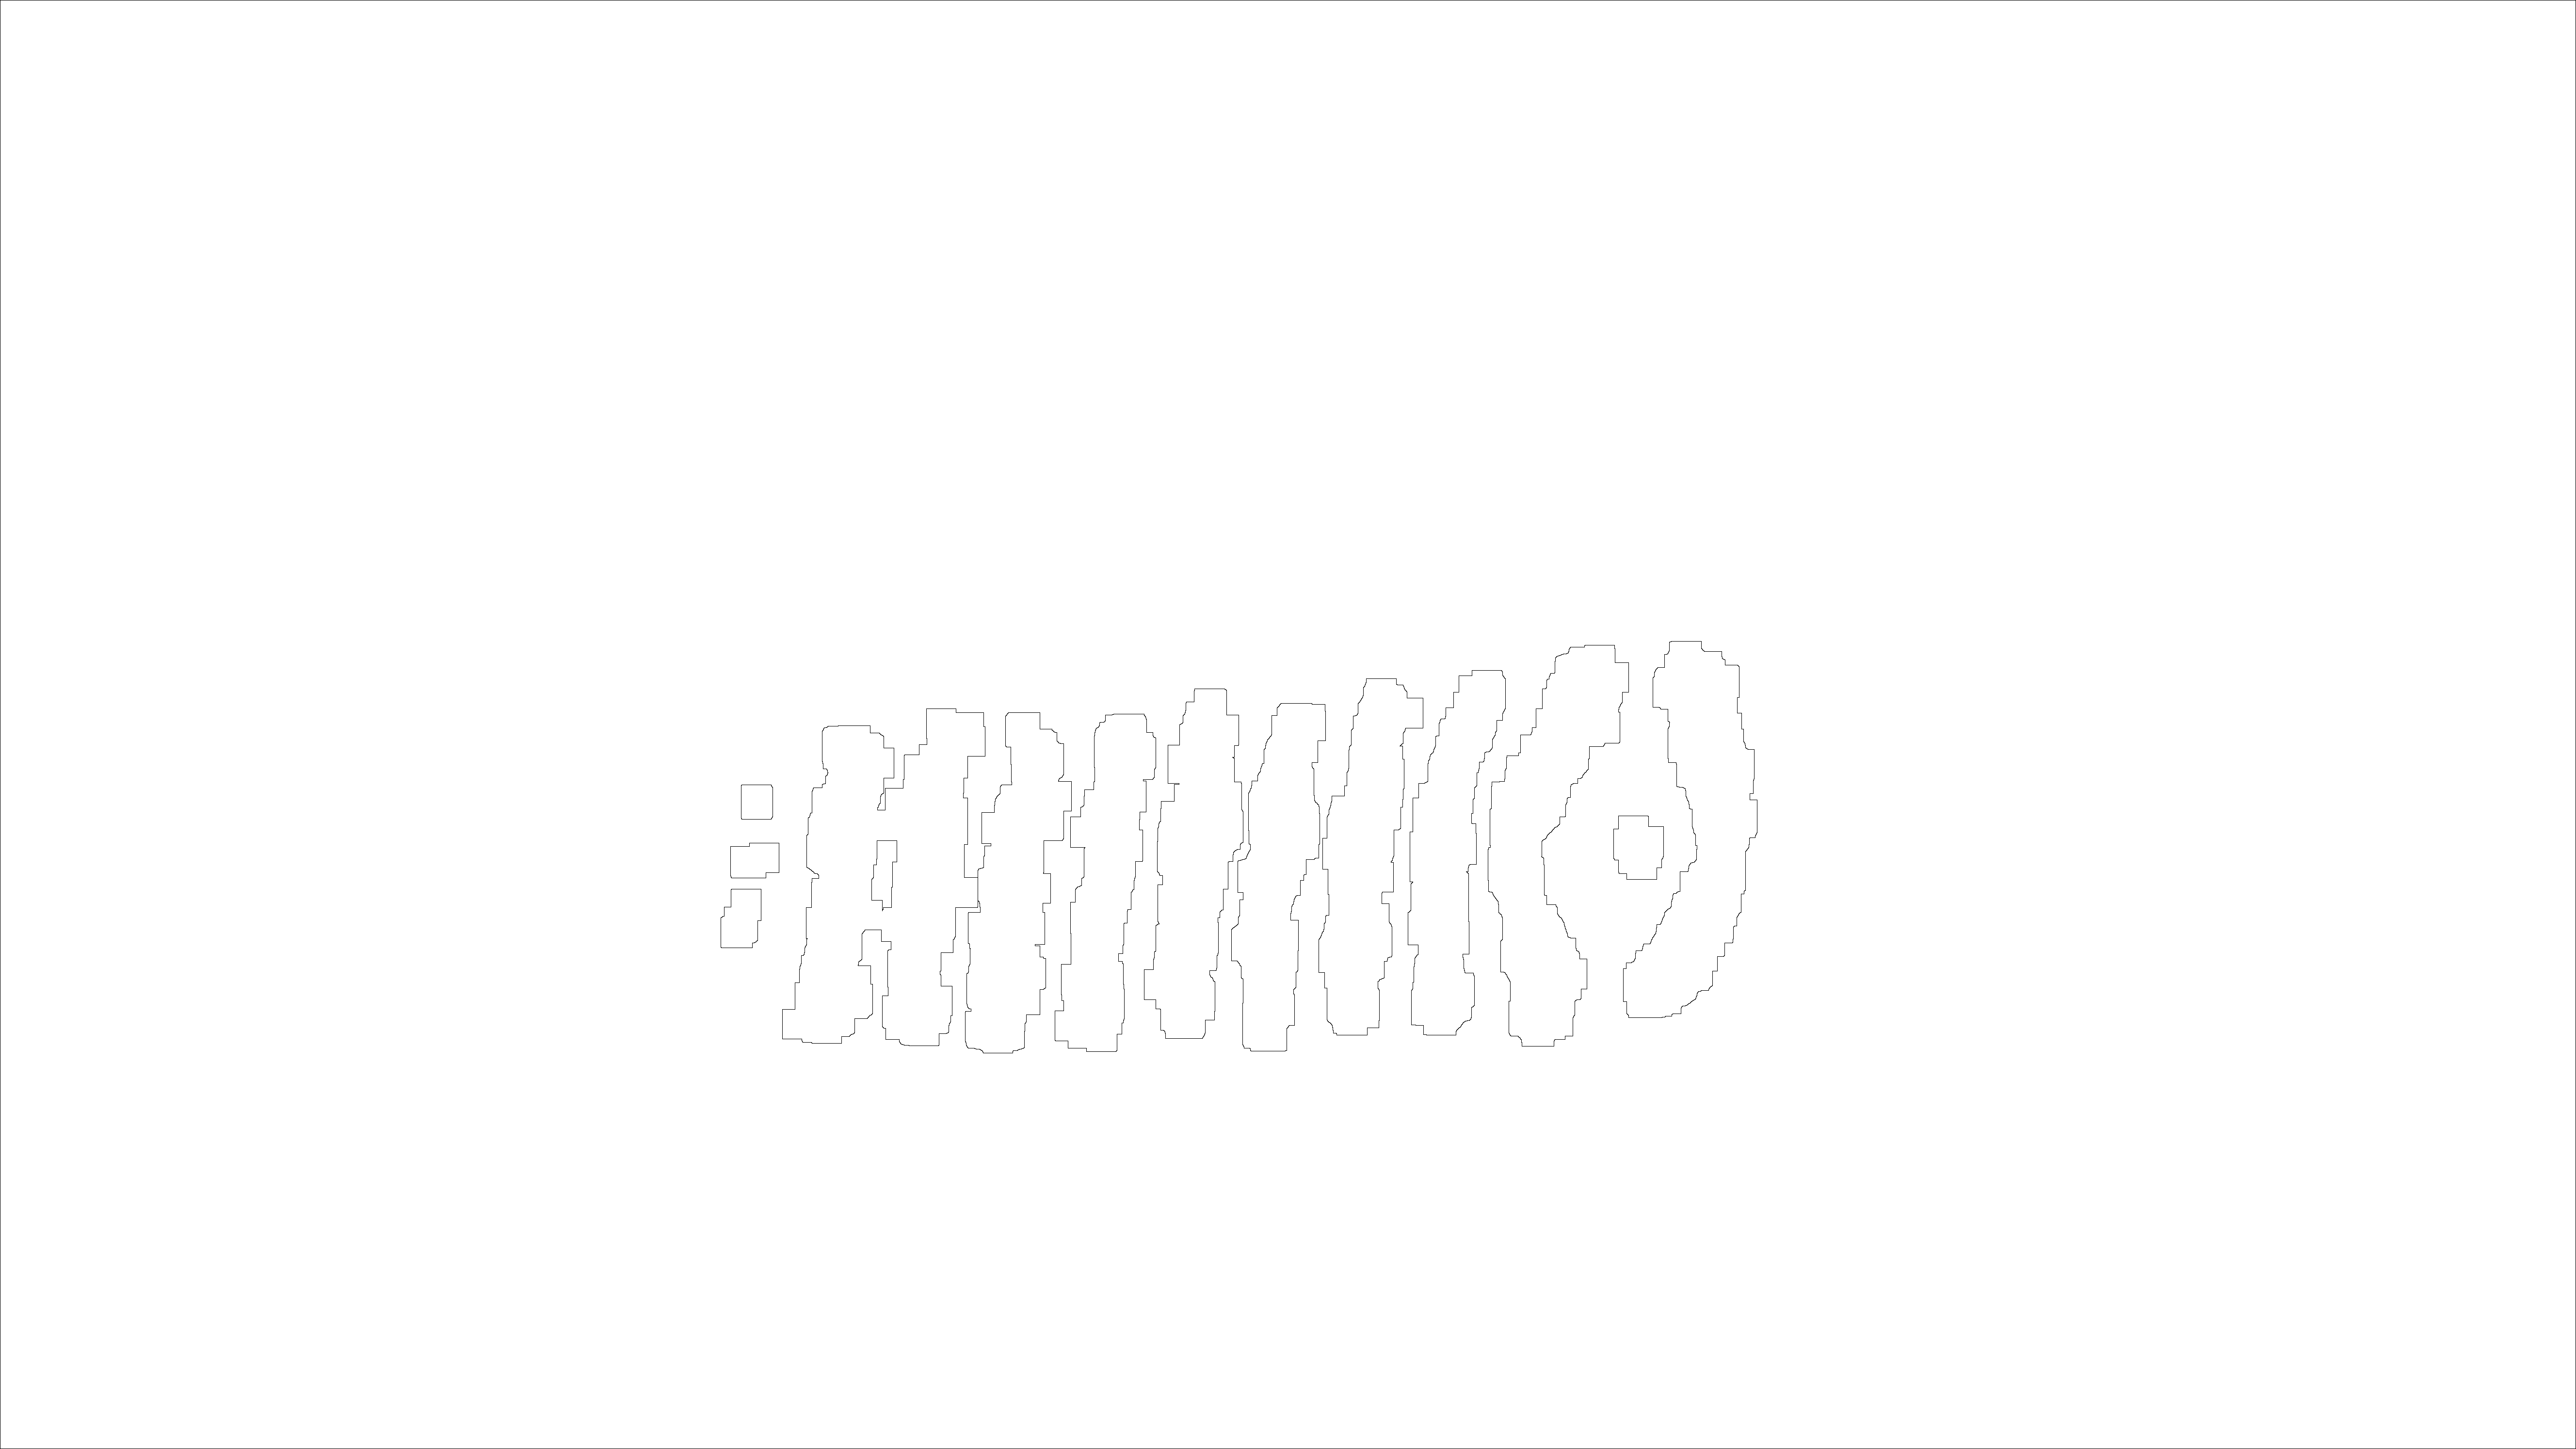

In [48]:
ff2r

In [49]:
xc = [[1,1,1],[1,0,1],[1,1,1]]

In [50]:
z,x = ndimage.measurements.label(ff2r,xc)
z,x

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 1, 1, ..., 1, 1, 0],
        [0, 1, 1, ..., 1, 1, 0],
        ..., 
        [0, 1, 1, ..., 1, 1, 0],
        [0, 1, 1, ..., 1, 1, 0],
        [0, 0, 0, ..., 0, 0, 0]]), 15)

In [51]:
np.unique(z)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [52]:
plt.imshow(z)

In [53]:
#object로 인지된 것들이 각각 어떻게 형성되어 있는지 확인
for i in range(0,x+1):
    plt.figure(figsize=(15,15))
    plt.imshow(z==i)

##  Crop

###  Getting rectangular point for original img

In [54]:
z.sum(axis=0)

array([   0, 2986, 2986, ..., 2986, 2986,    0])

In [55]:
z.shape

(2988L, 5312L)

In [56]:
z.sum(axis=0)

array([   0, 2986, 2986, ..., 2986, 2986,    0])

In [57]:
np.unique(z.sum(axis=0))

array([   0, 2917, 2924, ..., 9229, 9230, 9239])

In [58]:
def find_rect(x,margin = 0):
    '''return left upper right bottom'''
    rect = []
    for j,i in  enumerate(x.sum(axis=0)):
        if i != x.shape[0]:
            print("left is ",j)
            rect.append(j-margin)
            break
    for j,i in  enumerate(x.sum(axis=1)):
        if i != x.shape[1]:
            print("upper is ",j)
            rect.append(j-margin)

            break

    for j,i in  enumerate(reversed(x.sum(axis=0))):
        if i != x.shape[0] :
            print("right is ",x.shape[1]-j)
            rect.append(x.shape[1]-j+margin)
            break

    for j,i in  enumerate(reversed(x.sum(axis=1))):
        if i != x.shape[1]:
            print("bottom is ",x.shape[0]-j)
            rect.append(x.shape[0]-j+margin)
            break
    return rect

In [59]:
z.sum(axis=1)[-2]

5310

In [60]:
def find_rect2(x,margin = 0):
    '''return left upper right bottom'''
    ##TODO: margin을 percentile 로 적용, and 16:9 비율을 유지하도록 하는 방법 생각

    rect = []
    x_sum_1=x.sum(axis=1)
    x_sum_0=x.sum(axis=0)
    for j,i in  enumerate(x_sum_0):
        if i != x_sum_0[1] & i != 0 :
            print("left is ",j)
            rect.append(j-margin)
            break
    for j,i in  enumerate(x_sum_1):
        if i != x_sum_1[1] & i != 0:
            print("upper is ",j)
            rect.append(j-margin)
            break

    for j,i in  enumerate(reversed(x_sum_0)):
        if i != x_sum_0[-2] & i != 0:
            print("right is ",x.shape[1]-j)
            rect.append(x.shape[1]-j+margin)
            break

    for j,i in  enumerate(reversed(x_sum_1)):
        if i != x_sum_1[-2] & i != 0:
            print("bottom is ",x.shape[0]-j)
            rect.append(x.shape[0]-j+margin)
            break
    return rect

In [61]:
rect = find_rect2(z,0)

left is  1486
upper is  1322
right is  3624
bottom is  2171


In [62]:
z.shape

(2988L, 5312L)

In [63]:
rect

[1486, 1322, 3624L, 2171L]

In [64]:
z.shape

(2988L, 5312L)

### Crop original img by rect point

In [65]:
ee = ps_new2.crop(rect)

In [66]:
ee.size[0]/ee.size[1]

2.518256772673734

In [67]:
ee.save(path+'/none.jpg')

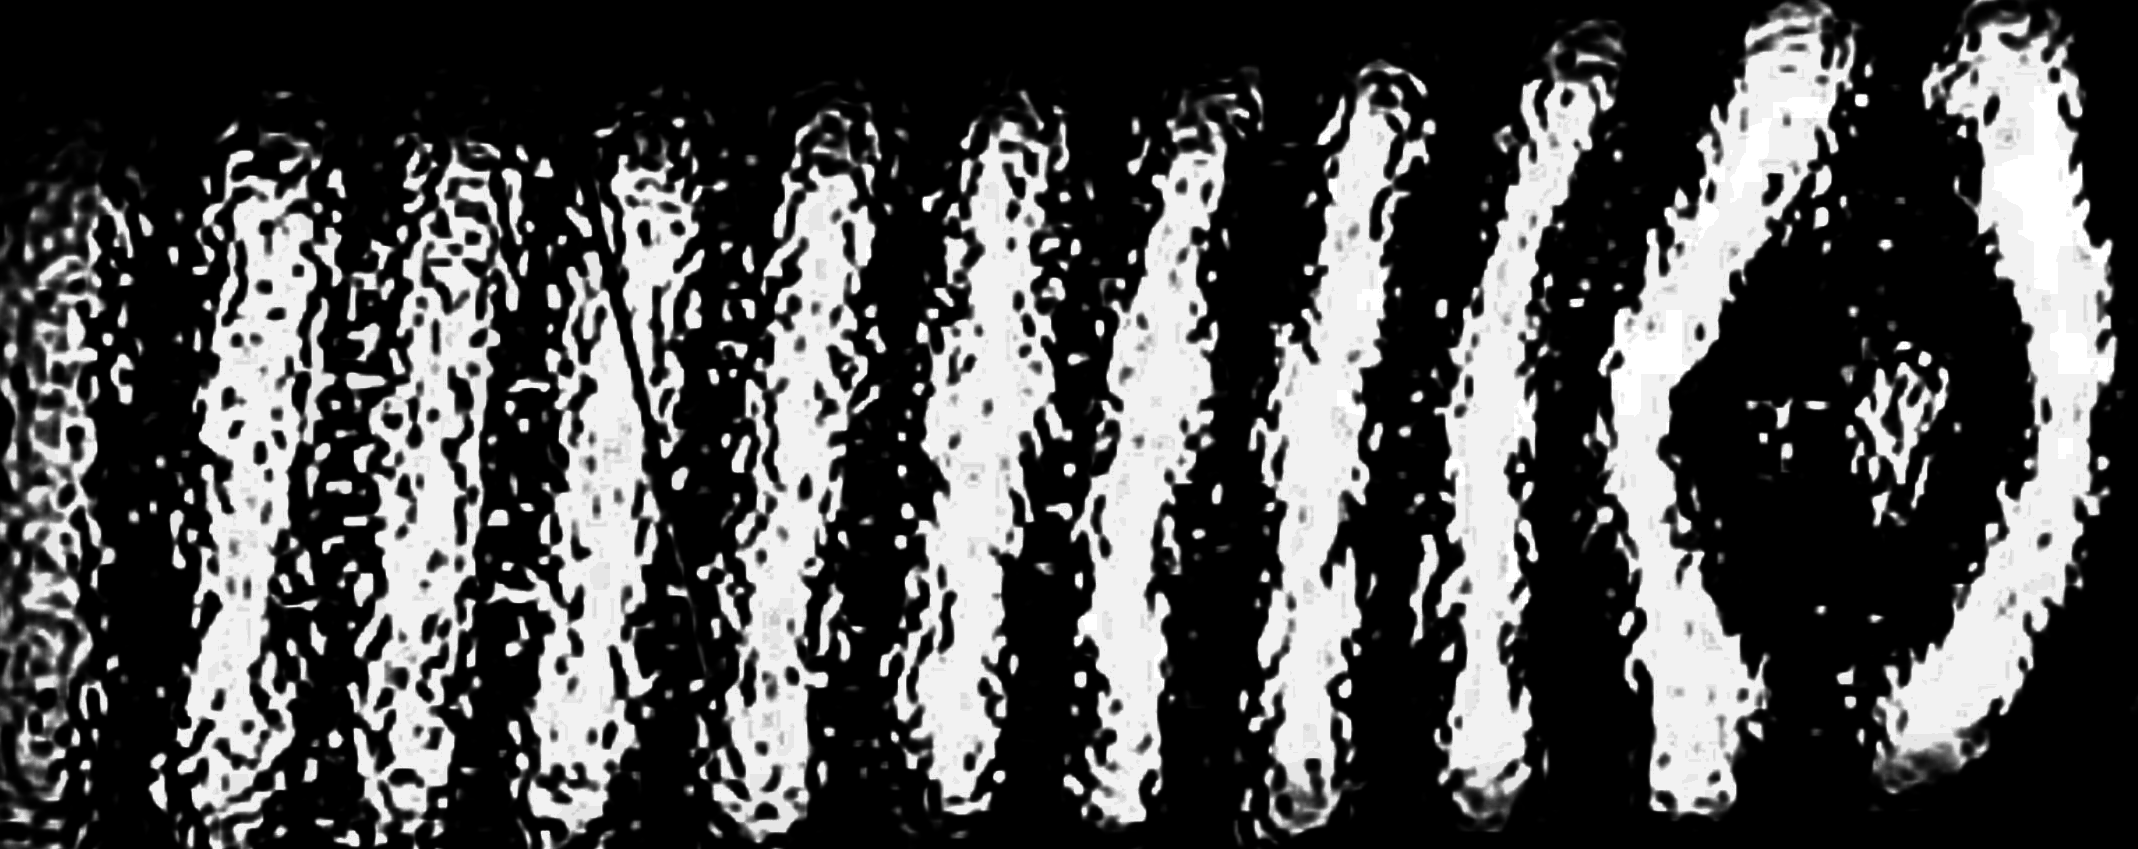

In [68]:
ps_new2.crop(rect)

In [69]:
plt.imshow(z)

In [70]:
zz = PIL.Image.fromarray(z*255,'1')

In [71]:
len(z.sum(axis=0))

5312

In [72]:
#!start c:\users\back_jud\anaconda2\lib\site-packages\pandas\core\config.py
#판다스 출력 설정

In [73]:
plt.imshow(z)

In [76]:
max_size = [0,0]
for imgs in get_files :
    imPath = path + imgs
    img = PIL.Image.open(imPath)
    img = img.point(lambda x : 255*(x/255)**13)
    img_c = img.convert('L') 
    img_ic = PIL.ImageOps.invert(img_c)
    img_ic = grey_ero_dil(img_ic,iterat=10, n_ero=10,n_dil= 40)
    img_bic = make_bw(PIL.Image.fromarray(img_ic))
    img_bic = img_bic.filter(PIL.ImageFilter.FIND_EDGES)
    img_bicr = PIL.ImageOps.invert(img_bic)
    lab_arr,num_lab = ndimage.measurements.label(img_bicr,structure=[[1,1,1],[1,0,1],[1,1,1]])
    print("object의 갯수 : " ,imgs, num_lab)
    idx_crop =  find_rect2(lab_arr,margin=200)
    im_final = img_c.crop(idx_crop)
    if im_final.size[0] > max_size[0]:
        max_size[0] = im_final.size[0]
    if im_final.size[1] > max_size[1]:
        max_size[1] = im_final.size[1]

    im_final.save(path+'test/'+imgs)
    
for imgs in listdir(path+'/test'):
    img = PIL.open(path+'/test/'+imgs)
    img

object의 갯수 :  E02 (1).jpg 12
left is  1241
upper is  1249
right is  3674
bottom is  2144
object의 갯수 :  E02 (10).jpg 15
left is  0
upper is  1104
right is  4545
bottom is  1858
object의 갯수 :  E02 (11).jpg 93
left is  2204
upper is  915
right is  4223
bottom is  2323
object의 갯수 :  E02 (12).jpg 85
left is  1951
upper is  844
right is  3896
bottom is  2269
object의 갯수 :  E02 (13).jpg 120
left is  2742
upper is  802
right is  4782
bottom is  2304
object의 갯수 :  E02 (14).jpg 116
left is  2320
upper is  970
right is  4336
bottom is  2453
object의 갯수 :  E02 (15).jpg 38
left is  1493
upper is  1253
right is  3891
bottom is  2310
object의 갯수 :  E02 (16).jpg 39
left is  1042
upper is  1220
right is  3597
bottom is  2231
object의 갯수 :  E02 (17).jpg 29
left is  1009
upper is  1000
right is  3677
bottom is  2018
object의 갯수 :  E02 (18).jpg 46
left is  903
upper is  1308
right is  3500
bottom is  2286
object의 갯수 :  E02 (19).jpg 17
left is  1026
upper is  1141
right is  3082
bottom is  1875
object의 갯수 :  E02

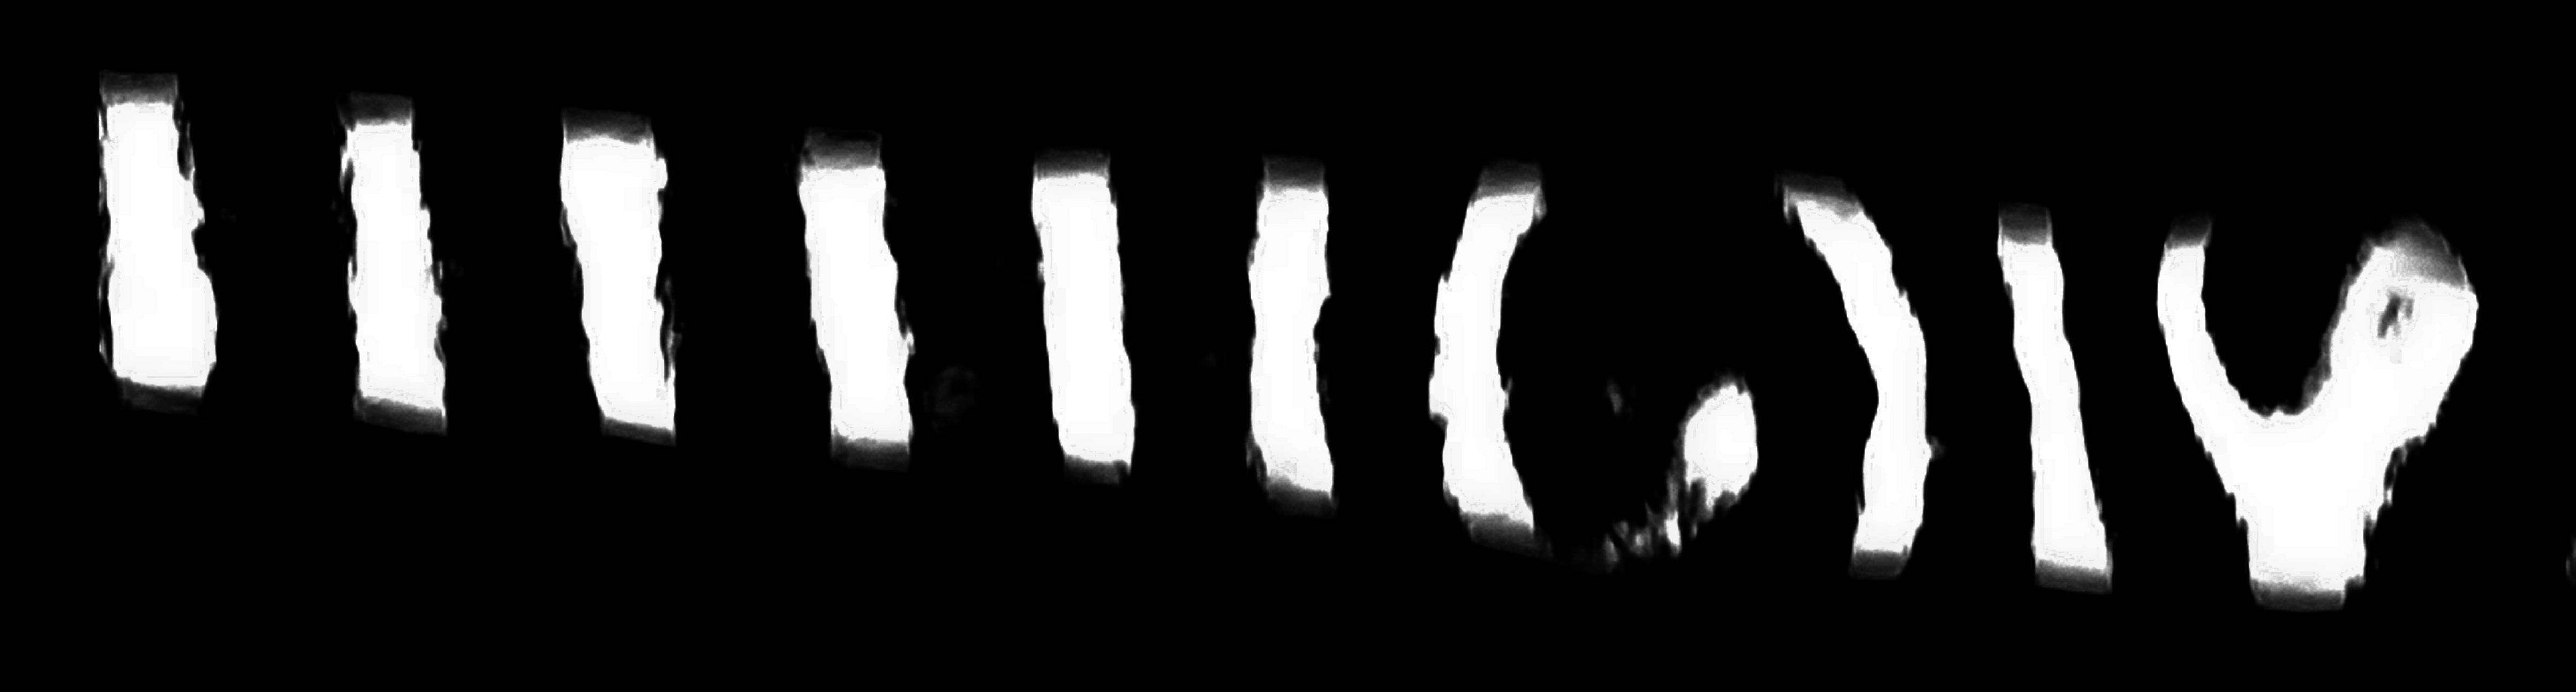

In [78]:
im_final

In [77]:
(path+'/test')

'D:\\project_tensorflow_class\\Data (1)\\original/err//test'